In [2]:
#########################
#Load Data and Packages into jupyter
#########################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_csv(r'C:\Users\sheahenk\Downloads\ProjectDataset.csv')

In [4]:
#############
# Change scientific notation to integer for id columns
#############
df['playerid'] = df['playerid'].astype(int)
df['wagerid'] = df['wagerid'].astype(int)

df['playerid'] = df['playerid'].astype(str)
df['wagerid'] = df['wagerid'].astype(str)

df.head()

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds
0,State1,30651211,1693004,2021-04-28 00:30:00+00,2021-04-27,2021-04-27,nhl,straight,won,6.64,-4.96,won,1.74627
1,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,won,1.78125
2,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.86207
3,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.74627
4,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.78125


In [5]:
###############################
# Examine quality of the data
###############################

In [6]:
###################
# Check info of dataframe
###################
# Get unique values for each column
unique_values = df.apply(lambda col: col.unique())

# Display the unique values for each column
for column, values in unique_values.items():
    print(f"Column '{column}': {values}")

print(df.info())
print(df.describe())

Column 'state': ['State1' 'State3' 'State2']
Column 'playerid': ['30651211' '22237170' '4682364' ... '40485215' '35651390' '40552101']
Column 'wagerid': ['1693004' '1696370' '1696652' ... '128198772' '128199174' '128201064']
Column 'event_start': ['2021-04-28 00:30:00+00' '2021-04-28 01:45:00+00'
 '2021-04-27 23:21:00+00' ... '2022-02-05 18:00:00+00'
 '2022-03-27 23:10:00+00' '2021-04-01 20:00:00+00']
Column 'placed_date': ['2021-04-27' '2021-04-28' '2021-04-29' '2021-04-30' '2021-05-01'
 '2021-05-02' '2021-05-03' '2021-05-04' '2021-05-05' '2021-05-06'
 '2021-05-07' '2021-05-08' '2021-05-09' '2021-05-10' '2021-03-28'
 '2021-03-29' '2021-05-11' '2021-03-30' '2021-05-12' '2021-09-09'
 '2021-03-31' '2021-05-13' '2021-04-01' '2021-09-10' '2021-05-14'
 '2021-04-02' '2021-09-11' '2021-04-03' '2021-05-15' '2021-04-04'
 '2021-05-16' '2021-09-12' '2021-04-05' '2021-05-17' '2021-04-06'
 '2021-05-18' '2021-09-13' '2021-04-07' '2021-05-19' '2021-09-14'
 '2021-05-20' '2021-04-08' '2021-09-15' '2021

          net_stake           ggr   decimalodds
count  4.174500e+06  4.174500e+06  4.172028e+06
mean   2.361655e+01  2.451643e+00  3.984459e+00
std    8.189246e+01  8.532259e+01  1.602930e+01
min    4.001000e+00 -2.100000e+04  1.000100e+00
25%    5.000000e+00  0.000000e+00  1.649350e+00
50%    1.000000e+01  6.000000e+00  1.909090e+00
75%    2.000000e+01  1.200000e+01  2.200000e+00
max    1.967200e+04  1.967200e+04  5.001000e+03


In [7]:
################
# Remove any bets that are voided, open or unknown
# In theory no bets should be open as all event dates are in the past
################
# List of values to check
values_to_check = ['void','open','unknown']
df[df['legresult'].isin(values_to_check)]

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds
105,State1,15421572,1768059,2021-04-27 23:21:00+00,2021-04-27,2021-04-27,mlb,straight,won,10.000000,0.000000,void,2.060000
148,State1,22248102,1790410,2021-04-29 00:11:00+00,2021-04-28,2021-04-28,mlb,parlay,lost,4.166666,4.166666,void,1.434780
160,State1,22238902,1803699,2021-04-29 00:11:00+00,2021-04-28,2021-04-28,mlb,parlay,lost,5.450000,5.450000,void,2.040000
175,State1,22324229,1820421,2021-04-29 00:11:00+00,2021-04-28,2021-04-28,mlb,parlay,won,5.000000,-4.900000,void,1.980390
225,State1,14941289,1868345,2021-04-29 00:11:00+00,2021-04-28,2021-04-28,mlb,parlay,lost,12.500000,12.500000,void,2.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174351,State3,22569599,127804546,2021-04-19 23:45:00+00,2021-04-19,2021-04-19,nba,parlay,lost,10.714285,10.714285,void,1.260000
4174354,State3,22569599,127804546,2021-04-19 23:45:00+00,2021-04-19,2021-04-19,nba,parlay,lost,10.714285,10.714285,void,2.041200
4174409,State3,23613420,128057104,2021-04-21 02:15:00+00,2021-04-20,2021-04-20,nba,parlay,lost,6.000000,6.000000,void,1.862068
4174418,State3,2668568,128057383,2021-04-21 18:11:00+00,2021-04-20,2021-04-21,mlb,parlay,lost,7.000000,7.000000,void,2.100000


In [8]:
# Create two DataFrames
df_dropped = df[df['legresult'].isin(values_to_check)]  # Rows where 'bet_type' is in the list

#~26K rows that can be removed with associated wager id

In [9]:
#Keeping main dataset clean
df = df[~df['legresult'].isin(values_to_check)]  # Rows where 'bet_type' is NOT in the list
df.head()

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds
0,State1,30651211,1693004,2021-04-28 00:30:00+00,2021-04-27,2021-04-27,nhl,straight,won,6.64,-4.96,won,1.74627
1,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,won,1.78125
2,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.86207
3,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.74627
4,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.78125


In [10]:
###########
# Check if dataframe contains any null values
###########
df.isnull().values.any()

True

In [11]:
###########
# Check which columns contain the nulls
###########
df.isna().any()

state           False
playerid        False
wagerid         False
event_start     False
placed_date     False
settled_date    False
sportname       False
bet_type        False
result          False
net_stake       False
ggr             False
legresult       False
decimalodds      True
dtype: bool

In [12]:
df[df.isna().any(axis=1)]

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds
936440,State1,22274815,48954813,2021-03-29 23:25:00+00,2021-03-29,2021-03-30,college basketball,parlay,won,5.00,-6.250,won,NaN
936441,State1,22274815,48954813,2021-03-30 02:02:00+00,2021-03-29,2021-03-30,college basketball,parlay,won,5.00,-6.250,won,NaN
936833,State1,28869488,49117399,2021-03-30 23:25:00+00,2021-03-30,2021-03-31,college basketball,parlay,lost,5.00,5.000,won,NaN
936834,State1,28869488,49117399,2021-03-31 02:07:00+00,2021-03-30,2021-03-31,college basketball,parlay,lost,5.00,5.000,lost,NaN
936850,State1,30914584,49121958,2021-03-31 02:07:00+00,2021-03-30,2021-03-31,college basketball,parlay,lost,4.84,4.840,lost,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164112,State2,24113572,154194919,2021-04-02 00:12:00+00,2021-04-01,2021-04-01,nba,parlay,won,6.04,-6.040,won,NaN
4165076,State2,22998961,171237233,2021-06-08 23:51:00+00,2021-06-08,2021-06-09,nba,parlay,won,12.50,-15.625,won,NaN
4165077,State2,22998961,171237233,2021-06-09 02:22:00+00,2021-06-08,2021-06-09,nba,parlay,won,12.50,-15.625,won,NaN
4173255,State3,23237258,125812231,2021-04-11 23:12:00+00,2021-04-11,2021-04-12,nba,parlay,lost,14.00,14.000,won,NaN


In [13]:
############
# Separate rows with NaN values
############
df_temp = df[df.isna().any(axis=1)]

############
# Remove rows with NaN values and store it in a new DataFrame
############
df_cleaned = df.dropna()

In [14]:
########
# View dropped df
########
df_dropped = pd.concat([df_dropped, df_temp], ignore_index=True)  # Reset index after concatenation
df_dropped.head()

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds
0,State1,15421572,1768059,2021-04-27 23:21:00+00,2021-04-27,2021-04-27,mlb,straight,won,10.000000,0.000000,void,2.06000
1,State1,22248102,1790410,2021-04-29 00:11:00+00,2021-04-28,2021-04-28,mlb,parlay,lost,4.166666,4.166666,void,1.43478
2,State1,22238902,1803699,2021-04-29 00:11:00+00,2021-04-28,2021-04-28,mlb,parlay,lost,5.450000,5.450000,void,2.04000
3,State1,22324229,1820421,2021-04-29 00:11:00+00,2021-04-28,2021-04-28,mlb,parlay,won,5.000000,-4.900000,void,1.98039
4,State1,14941289,1868345,2021-04-29 00:11:00+00,2021-04-28,2021-04-28,mlb,parlay,lost,12.500000,12.500000,void,2.84000


In [15]:
###########
# View Cleaned df
###########
df_cleaned.head()

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds
0,State1,30651211,1693004,2021-04-28 00:30:00+00,2021-04-27,2021-04-27,nhl,straight,won,6.64,-4.96,won,1.74627
1,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,won,1.78125
2,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.86207
3,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.74627
4,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.78125


In [16]:
################
# Check that no (playerid, wagerid) combinations in the dropped df also exist in the cleaned df
################

# Create sets of (playerid, wagerid) combinations for both DataFrames
dropped_combinations = set(zip(df_dropped['playerid'], df_dropped['wagerid']))
cleaned_combinations = set(zip(df_cleaned['playerid'], df_cleaned['wagerid']))

# Find matching combinations
matching_combinations = dropped_combinations.intersection(cleaned_combinations)

# Print the result
print("Matching (playerid, wagerid) combinations:", matching_combinations)


Matching (playerid, wagerid) combinations: {('583381', '14948181'), ('30625853', '46586106'), ('21045223', '7616024'), ('22991037', '99298467'), ('22954782', '42456293'), ('23790679', '109659027'), ('20732514', '64734724'), ('23395605', '126418724'), ('19828775', '29875477'), ('22981140', '38085681'), ('7458787', '40457326'), ('23046001', '80105655'), ('33784092', '48118123'), ('18604709', '27367902'), ('23616881', '80506705'), ('27980761', '18965455'), ('18986013', '56533888'), ('22195725', '43656401'), ('912647', '20919914'), ('33358263', '9244426'), ('29237426', '4786790'), ('35259178', '7533737'), ('25870911', '126028479'), ('23416148', '60186832'), ('24922557', '27741955'), ('23699005', '12162411'), ('27330478', '155712391'), ('22748841', '49686773'), ('31589531', '20706452'), ('24616134', '154943189'), ('28029760', '37094387'), ('11586171', '59303086'), ('22217348', '2157535'), ('23795129', '10366927'), ('22213023', '20420012'), ('22512426', '53342597'), ('912647', '57933196'), (

In [17]:
##################
# Remove rows where (playerid, wagerid) matches any combination in the list
##################

# Create a set of (playerid, wagerid) combinations to filter out
combos_to_remove = set(zip(df_dropped['playerid'], df_dropped['wagerid']))

# Filter rows where (playerid, wagerid) combinations do not match
df_filtered = df_cleaned.loc[~df_cleaned[['playerid', 'wagerid']].apply(tuple, axis=1).isin(combos_to_remove)].reset_index(drop=True)

# Display the filtered DataFrame
df_filtered.head()


,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds
0,State1,30651211,1693004,2021-04-28 00:30:00+00,2021-04-27,2021-04-27,nhl,straight,won,6.64,-4.96,won,1.74627
1,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,won,1.78125
2,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.86207
3,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.74627
4,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.78125


In [18]:
##################
# Validate that the dataframe contains no null values
##################
df_filtered.isnull().values.any()

False

In [19]:
#####################
# Perform Transformation of columns
#####################

In [20]:
df_filtered[['date', 'time_offset']] = df_filtered['event_start'].str.split(' ', expand=True)
df_filtered[['time', 'timezone_offset']] = df_filtered['time_offset'].str.split('+', expand=True)

# Dropping the original and intermediate columns if needed
df_filtered = df_filtered.drop(columns=['time_offset']) 

df_filtered.head()


,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds,date,time,timezone_offset
0,State1,30651211,1693004,2021-04-28 00:30:00+00,2021-04-27,2021-04-27,nhl,straight,won,6.64,-4.96,won,1.74627,2021-04-28,00:30:00,00
1,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,won,1.78125,2021-04-28,01:45:00,00
2,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.86207,2021-04-28,01:45:00,00
3,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.74627,2021-04-28,01:45:00,00
4,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.78125,2021-04-28,01:45:00,00


In [21]:
############
# Check the date range
############
date_min = df_filtered['date'].min()
date_max = df_filtered['date'].max()

print(f"Date range: {date_min} to {date_max}")

Date range: 0001-12-30 to 2022-07-20


In [22]:
################
# see where this error exists 
################
df_filtered[df_filtered['date']=='0001-12-30']

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds,date,time,timezone_offset
7719,State1,22683957,4051035,0001-12-30 00:00:00+00,2021-04-08,2021-04-09,nba,parlay,won,21.020000,10.773333,won,1.08696,0001-12-30,00:00:00,00
7726,State1,22683957,4051074,0001-12-30 00:00:00+00,2021-04-08,2021-04-09,nba,parlay,won,4.166666,2.421666,won,1.08696,0001-12-30,00:00:00,00
7868,State1,22683957,4076549,0001-12-30 00:00:00+00,2021-04-09,2021-04-09,nba,parlay,won,5.000000,2.568000,won,1.13333,0001-12-30,00:00:00,00
18298,State1,22177779,4108515,0001-12-30 00:00:00+00,2021-04-09,2021-04-09,nba,straight,won,10.000000,-9.090000,won,1.90909,0001-12-30,00:00:00,00
29920,State1,22683957,4098150,0001-12-30 00:00:00+00,2021-04-09,2021-04-09,nba,parlay,won,33.333333,-38.743333,won,1.18182,0001-12-30,00:00:00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277415,State1,13711607,7693117,0001-12-30 00:00:00+00,2021-05-30,2021-05-30,nba,parlay,lost,11.570000,11.570000,lost,2.28000,0001-12-30,00:00:00,00
277430,State1,21175456,7700670,0001-12-30 00:00:00+00,2021-05-30,2021-05-30,nba,straight,won,4.630000,-3.050000,won,1.65789,0001-12-30,00:00:00,00
308225,State1,22674863,7686331,0001-12-30 00:00:00+00,2021-05-30,2021-05-30,nba,parlay,won,6.666666,-13.663333,won,1.65789,0001-12-30,00:00:00,00
332388,State1,2102856,7621189,0001-12-30 00:00:00+00,2021-05-30,2021-05-30,nba,straight,lost,106.000000,106.000000,lost,1.94340,0001-12-30,00:00:00,00


In [23]:
#################
# remove bets that have this date
################# 
df_filtered = df_filtered[df_filtered.date != '0001-12-30']
date_min = df_filtered['date'].min()
date_max = df_filtered['date'].max()

print(f"Date range: {date_min} to {date_max}")

Date range: 2021-03-20 to 2022-07-20


In [24]:
# Rename multiple columns using .rename()
df_filtered = df_filtered.rename(columns={
    'date': 'event_start_date',
    'time': 'event_start_time'
})

In [25]:
################
# Maintenance
################
%whos


Variable                Type         Data/Info
----------------------------------------------
cleaned_combinations    set          {('583381', '14948181'), <...>('22378451', '11151297')}
column                  str          decimalodds
combos_to_remove        set          {('583381', '14948181'), <...>'10519036', '171194692')}
date_max                str          2022-07-20
date_min                str          2021-03-20
df                      DataFrame              state  playerid<...>148176 rows x 13 columns]
df_cleaned              DataFrame              state  playerid<...>145722 rows x 13 columns]
df_dropped              DataFrame            state  playerid  <...>[28778 rows x 13 columns]
df_filtered             DataFrame              state  playerid<...>090305 rows x 16 columns]
df_temp                 DataFrame              state  playerid<...>n[2454 rows x 13 columns]
dropped_combinations    set          {('583381', '14948181'), <...>'10519036', '171194692')}
matching_combinat

In [26]:
del df
del df_cleaned
del df_dropped
del df_temp

In [27]:
###################
# covnert ot date time
###################
df_filtered['placed_date'] = pd.to_datetime(df_filtered['placed_date'])
df_filtered['event_start_date'] = pd.to_datetime(df_filtered['event_start_date'])
df_filtered['settled_date'] = pd.to_datetime(df_filtered['settled_date'])
df_filtered['event_start_time'] = pd.to_datetime(df_filtered['event_start_time'], format='%H:%M:%S').dt.time

df_filtered.dtypes


state                       object
playerid                    object
wagerid                     object
event_start                 object
placed_date         datetime64[ns]
settled_date        datetime64[ns]
sportname                   object
bet_type                    object
result                      object
net_stake                  float64
ggr                        float64
legresult                   object
decimalodds                float64
event_start_date    datetime64[ns]
event_start_time            object
timezone_offset             object
dtype: object

In [28]:
df_filtered['playerid_wagerid'] = df_filtered['playerid'] + df_filtered['wagerid']
df_filtered.head()

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds,event_start_date,event_start_time,timezone_offset,playerid_wagerid
0,State1,30651211,1693004,2021-04-28 00:30:00+00,2021-04-27,2021-04-27,nhl,straight,won,6.64,-4.96,won,1.74627,2021-04-28,00:30:00,00,306512111693004
1,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,won,1.78125,2021-04-28,01:45:00,00,222371701696370
2,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.86207,2021-04-28,01:45:00,00,222371701696370
3,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.74627,2021-04-28,01:45:00,00,222371701696370
4,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.78125,2021-04-28,01:45:00,00,222371701696370


In [29]:
straight = df_filtered[df_filtered['bet_type']=='straight']
straight

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds,event_start_date,event_start_time,timezone_offset,playerid_wagerid
0,State1,30651211,1693004,2021-04-28 00:30:00+00,2021-04-27,2021-04-27,nhl,straight,won,6.64,-4.960000,won,1.746270,2021-04-28,00:30:00,00,306512111693004
5,State1,4682364,1696652,2021-04-27 23:21:00+00,2021-04-27,2021-04-27,mlb,straight,won,5.00,-2.870000,won,1.574710,2021-04-27,23:21:00,00,46823641696652
6,State1,4682364,1696680,2021-04-27 23:21:00+00,2021-04-27,2021-04-27,mlb,straight,won,5.00,-1.280000,won,1.256410,2021-04-27,23:21:00,00,46823641696680
7,State1,22241058,1701957,2021-04-27 19:00:00+00,2021-04-27,2021-04-27,champions league,straight,lost,5.00,5.000000,lost,2.500000,2021-04-27,19:00:00,00,222410581701957
8,State1,25492851,1702804,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,straight,lost,10.00,10.000000,lost,1.714290,2021-04-28,01:45:00,00,254928511702804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090735,State3,24663637,128188322,2021-04-21 02:00:00+00,2021-04-20,2021-04-20,nba,straight,won,15.00,-15.000000,won,2.000000,2021-04-21,02:00:00,00,24663637128188322
4090736,State3,24762947,128192386,2021-04-20 23:45:00+00,2021-04-20,2021-04-20,nba,straight,won,20.00,10.900000,lost,1.757575,2021-04-20,23:45:00,00,24762947128192386
4090737,State3,23237258,128194161,2021-04-21 01:39:00+00,2021-04-20,2021-04-20,mlb,straight,won,75.00,-68.181818,won,1.909090,2021-04-21,01:39:00,00,23237258128194161
4090742,State3,2324385,128196495,2021-04-21 01:10:00+00,2021-04-20,2021-04-20,nhl,straight,won,10.00,-49.000000,won,5.900000,2021-04-21,01:10:00,00,2324385128196495


In [30]:
parlay = df_filtered[df_filtered['bet_type']=='parlay']
# Step 1: Calculate the number of legs per sport in each parlay
parlay['sport_count'] = parlay.groupby(['playerid_wagerid', 'sportname'])['sportname'].transform('count')

# Step 2: Allocate net_stake and ggr proportionally to each sport
parlay['allocated_net_stake'] = parlay['net_stake'] / parlay['sport_count']
parlay['allocated_ggr'] = parlay['ggr'] / parlay['sport_count']
parlay['ggr_margin'] = (parlay['allocated_ggr'] / parlay['allocated_net_stake']) 
parlay

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds,event_start_date,event_start_time,timezone_offset,playerid_wagerid,sport_count,allocated_net_stake,allocated_ggr,ggr_margin
1,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,won,1.781250,2021-04-28,01:45:00,00,222371701696370,4,1.250,1.250,1.0
2,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.862070,2021-04-28,01:45:00,00,222371701696370,4,1.250,1.250,1.0
3,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.746270,2021-04-28,01:45:00,00,222371701696370,4,1.250,1.250,1.0
4,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.781250,2021-04-28,01:45:00,00,222371701696370,4,1.250,1.250,1.0
10,State1,1499189,1702908,2021-04-27 23:15:00+00,2021-04-27,2021-04-27,nba,parlay,lost,6.31,6.31,lost,1.909090,2021-04-27,23:15:00,00,14991891702908,2,3.155,3.155,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090747,State3,23395605,128198772,2021-04-21 02:15:00+00,2021-04-20,2021-04-21,nba,parlay,lost,12.50,12.50,lost,2.051000,2021-04-21,02:15:00,00,23395605128198772,4,3.125,3.125,1.0
4090748,State3,23395605,128199174,2021-04-21 02:15:00+00,2021-04-20,2021-04-21,nba,parlay,lost,5.00,5.00,lost,3.700000,2021-04-21,02:15:00,00,23395605128199174,2,2.500,2.500,1.0
4090749,State3,23395605,128199174,2021-04-21 02:15:00+00,2021-04-20,2021-04-21,nba,parlay,lost,5.00,5.00,won,1.833333,2021-04-21,02:15:00,00,23395605128199174,2,2.500,2.500,1.0
4090750,State3,23237258,128201064,2021-04-21 02:11:00+00,2021-04-20,2021-04-20,mlb,parlay,lost,14.50,14.50,won,1.606060,2021-04-21,02:11:00,00,23237258128201064,2,7.250,7.250,1.0


In [31]:
straight['sport_count'] = 1
straight['allocated_net_stake'] = straight['net_stake']
straight['allocated_ggr'] = straight['ggr']
straight['ggr_margin'] = (straight['allocated_ggr'] / straight['allocated_net_stake']) 
# Combine the dataframes
final_df = pd.concat([straight, parlay], ignore_index=True)
final_df

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds,event_start_date,event_start_time,timezone_offset,playerid_wagerid,sport_count,allocated_net_stake,allocated_ggr,ggr_margin
0,State1,30651211,1693004,2021-04-28 00:30:00+00,2021-04-27,2021-04-27,nhl,straight,won,6.64,-4.96,won,1.746270,2021-04-28,00:30:00,00,306512111693004,1,6.640,-4.960,-0.746988
1,State1,4682364,1696652,2021-04-27 23:21:00+00,2021-04-27,2021-04-27,mlb,straight,won,5.00,-2.87,won,1.574710,2021-04-27,23:21:00,00,46823641696652,1,5.000,-2.870,-0.574000
2,State1,4682364,1696680,2021-04-27 23:21:00+00,2021-04-27,2021-04-27,mlb,straight,won,5.00,-1.28,won,1.256410,2021-04-27,23:21:00,00,46823641696680,1,5.000,-1.280,-0.256000
3,State1,22241058,1701957,2021-04-27 19:00:00+00,2021-04-27,2021-04-27,champions league,straight,lost,5.00,5.00,lost,2.500000,2021-04-27,19:00:00,00,222410581701957,1,5.000,5.000,1.000000
4,State1,25492851,1702804,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,straight,lost,10.00,10.00,lost,1.714290,2021-04-28,01:45:00,00,254928511702804,1,10.000,10.000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090300,State3,23395605,128198772,2021-04-21 02:15:00+00,2021-04-20,2021-04-21,nba,parlay,lost,12.50,12.50,lost,2.051000,2021-04-21,02:15:00,00,23395605128198772,4,3.125,3.125,1.000000
4090301,State3,23395605,128199174,2021-04-21 02:15:00+00,2021-04-20,2021-04-21,nba,parlay,lost,5.00,5.00,lost,3.700000,2021-04-21,02:15:00,00,23395605128199174,2,2.500,2.500,1.000000
4090302,State3,23395605,128199174,2021-04-21 02:15:00+00,2021-04-20,2021-04-21,nba,parlay,lost,5.00,5.00,won,1.833333,2021-04-21,02:15:00,00,23395605128199174,2,2.500,2.500,1.000000
4090303,State3,23237258,128201064,2021-04-21 02:11:00+00,2021-04-20,2021-04-20,mlb,parlay,lost,14.50,14.50,won,1.606060,2021-04-21,02:11:00,00,23237258128201064,2,7.250,7.250,1.000000


In [32]:
len(final_df) == len(df_filtered)

True

In [33]:
del df_filtered

In [34]:
%whos

Variable                Type         Data/Info
----------------------------------------------
cleaned_combinations    set          {('583381', '14948181'), <...>('22378451', '11151297')}
column                  str          decimalodds
combos_to_remove        set          {('583381', '14948181'), <...>'10519036', '171194692')}
date_max                str          2022-07-20
date_min                str          2021-03-20
dropped_combinations    set          {('583381', '14948181'), <...>'10519036', '171194692')}
final_df                DataFrame              state  playerid<...>090305 rows x 21 columns]
matching_combinations   set          {('583381', '14948181'), <...>'18191344', '176138253')}
np                      module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
parlay                  DataFrame              state  playerid<...>382792 rows x 21 columns]
pd                      module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt              

In [35]:
final_df = final_df.drop(['event_start','timezone_offset','net_stake','ggr','ggr_margin'], axis=1)
final_df.head()

,state,playerid,wagerid,placed_date,settled_date,sportname,bet_type,result,legresult,decimalodds,event_start_date,event_start_time,playerid_wagerid,sport_count,allocated_net_stake,allocated_ggr
0,State1,30651211,1693004,2021-04-27,2021-04-27,nhl,straight,won,won,1.74627,2021-04-28,00:30:00,306512111693004,1,6.64,-4.96
1,State1,4682364,1696652,2021-04-27,2021-04-27,mlb,straight,won,won,1.57471,2021-04-27,23:21:00,46823641696652,1,5.00,-2.87
2,State1,4682364,1696680,2021-04-27,2021-04-27,mlb,straight,won,won,1.25641,2021-04-27,23:21:00,46823641696680,1,5.00,-1.28
3,State1,22241058,1701957,2021-04-27,2021-04-27,champions league,straight,lost,lost,2.50000,2021-04-27,19:00:00,222410581701957,1,5.00,5.00
4,State1,25492851,1702804,2021-04-27,2021-04-27,nba,straight,lost,lost,1.71429,2021-04-28,01:45:00,254928511702804,1,10.00,10.00


In [36]:
final_df = final_df.sort_values(['playerid','wagerid','placed_date'])
final_df.head()

,state,playerid,wagerid,placed_date,settled_date,sportname,bet_type,result,legresult,decimalodds,event_start_date,event_start_time,playerid_wagerid,sport_count,allocated_net_stake,allocated_ggr
409045,State1,10005028,17462236,2021-09-11,2021-09-12,nfl,straight,lost,lost,1.884959,2021-09-12,20:28:00,1000502817462236,1,5.000000,5.000000
409047,State1,10005028,17462734,2021-09-11,2021-09-13,nfl,straight,lost,lost,1.909090,2021-09-12,17:00:00,1000502817462734,1,10.000000,10.000000
1924152,State3,10009800,10833379,2021-10-25,2021-10-25,nba,parlay,lost,won,1.769229,2021-10-25,23:42:00,1000980010833379,2,5.000000,5.000000
1924153,State3,10009800,10833379,2021-10-25,2021-10-25,nba,parlay,lost,lost,10.800000,2021-10-25,23:41:00,1000980010833379,2,5.000000,5.000000
1943396,State3,10009800,11405729,2021-10-28,2021-10-28,nfl,parlay,lost,won,4.600000,2021-10-29,00:23:00,1000980011405729,1,6.666666,6.666666


In [37]:
import pandas as pd

def add_new_column_based_on_conditions(df, playerid_col, wagerid_col, new_col_name):
    """
    Adds a new column to the DataFrame based on specific conditions:
      1. Reset to 1 for a new playerid.
      2. Keep the same value if the playerid_wagerid is the same.
      3. Increment by 1 otherwise.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        playerid_col (str): The column name for player IDs.
        wagerid_col (str): The column name for wager IDs.
        new_col_name (str): The name of the new column to add.
    
    Returns:
        pd.DataFrame: The DataFrame with the new column added.
    """
    # Initialize an empty list to store the new column data
    new_column = []

    # Initialize tracking variables
    previous_playerid = None
    previous_wagerid = None
    previous_new_value = 0

    # Iterate over DataFrame rows
    for index, row in df.iterrows():
        if row[playerid_col] != previous_playerid:
            # Condition 1: Reset to 1 for a new playerid
            new_value = 1
        elif row[wagerid_col] == previous_wagerid:
            # Condition 2: Keep the same value if the wagerid is the same
            new_value = previous_new_value
        else:
            # Condition 3: Increment by 1
            new_value = previous_new_value + 1

        # Append the new value to the list
        new_column.append(new_value)
        
        # Update tracking variables
        previous_playerid = row[playerid_col]
        previous_wagerid = row[wagerid_col]
        previous_new_value = new_value

    # Add the new column to the DataFrame
    df[new_col_name] = new_column
    return df.head()


In [38]:
add_new_column_based_on_conditions(final_df, 'playerid', 'playerid_wagerid', 'Wager_Order')

,state,playerid,wagerid,placed_date,settled_date,sportname,bet_type,result,legresult,decimalodds,event_start_date,event_start_time,playerid_wagerid,sport_count,allocated_net_stake,allocated_ggr,Wager_Order
409045,State1,10005028,17462236,2021-09-11,2021-09-12,nfl,straight,lost,lost,1.884959,2021-09-12,20:28:00,1000502817462236,1,5.000000,5.000000,1
409047,State1,10005028,17462734,2021-09-11,2021-09-13,nfl,straight,lost,lost,1.909090,2021-09-12,17:00:00,1000502817462734,1,10.000000,10.000000,2
1924152,State3,10009800,10833379,2021-10-25,2021-10-25,nba,parlay,lost,won,1.769229,2021-10-25,23:42:00,1000980010833379,2,5.000000,5.000000,1
1924153,State3,10009800,10833379,2021-10-25,2021-10-25,nba,parlay,lost,lost,10.800000,2021-10-25,23:41:00,1000980010833379,2,5.000000,5.000000,1
1943396,State3,10009800,11405729,2021-10-28,2021-10-28,nfl,parlay,lost,won,4.600000,2021-10-29,00:23:00,1000980011405729,1,6.666666,6.666666,2


In [39]:
# Step 1: Remove duplicates for playerid_wagerid and count unique wagerids per playerid
unique_player_wager_counts = final_df[['playerid', 'playerid_wagerid']].drop_duplicates() \
    .groupby('playerid').agg(total_bets=('playerid_wagerid', 'count')).reset_index()

# Display a preview of unique counts
unique_player_wager_counts.head()


,playerid,total_bets
0,10005028,2
1,10009800,33
2,10010175,329
3,10013683,392
4,10019342,1


In [40]:
# Step 3: Merge the total bets into the reduced DataFrame
final_df = final_df.merge(unique_player_wager_counts, on='playerid')
final_df.head()

,state,playerid,wagerid,placed_date,settled_date,sportname,bet_type,result,legresult,decimalodds,event_start_date,event_start_time,playerid_wagerid,sport_count,allocated_net_stake,allocated_ggr,Wager_Order,total_bets
0,State1,10005028,17462236,2021-09-11,2021-09-12,nfl,straight,lost,lost,1.884959,2021-09-12,20:28:00,1000502817462236,1,5.000000,5.000000,1,2
1,State1,10005028,17462734,2021-09-11,2021-09-13,nfl,straight,lost,lost,1.909090,2021-09-12,17:00:00,1000502817462734,1,10.000000,10.000000,2,2
2,State3,10009800,10833379,2021-10-25,2021-10-25,nba,parlay,lost,won,1.769229,2021-10-25,23:42:00,1000980010833379,2,5.000000,5.000000,1,33
3,State3,10009800,10833379,2021-10-25,2021-10-25,nba,parlay,lost,lost,10.800000,2021-10-25,23:41:00,1000980010833379,2,5.000000,5.000000,1,33
4,State3,10009800,11405729,2021-10-28,2021-10-28,nfl,parlay,lost,won,4.600000,2021-10-29,00:23:00,1000980011405729,1,6.666666,6.666666,2,33


In [41]:
# Step 4: Assign "early" or "later" phase based on the bet_rank and total_bets
final_df['phase'] = np.where(
    final_df['Wager_Order'] <= (final_df['total_bets'] / 2),
    'early',
    'later'
)

In [42]:
final_df.head()

,state,playerid,wagerid,placed_date,settled_date,sportname,bet_type,result,legresult,decimalodds,event_start_date,event_start_time,playerid_wagerid,sport_count,allocated_net_stake,allocated_ggr,Wager_Order,total_bets,phase
0,State1,10005028,17462236,2021-09-11,2021-09-12,nfl,straight,lost,lost,1.884959,2021-09-12,20:28:00,1000502817462236,1,5.000000,5.000000,1,2,early
1,State1,10005028,17462734,2021-09-11,2021-09-13,nfl,straight,lost,lost,1.909090,2021-09-12,17:00:00,1000502817462734,1,10.000000,10.000000,2,2,later
2,State3,10009800,10833379,2021-10-25,2021-10-25,nba,parlay,lost,won,1.769229,2021-10-25,23:42:00,1000980010833379,2,5.000000,5.000000,1,33,early
3,State3,10009800,10833379,2021-10-25,2021-10-25,nba,parlay,lost,lost,10.800000,2021-10-25,23:41:00,1000980010833379,2,5.000000,5.000000,1,33,early
4,State3,10009800,11405729,2021-10-28,2021-10-28,nfl,parlay,lost,won,4.600000,2021-10-29,00:23:00,1000980011405729,1,6.666666,6.666666,2,33,early


In [ ]:
##########################
# Analytics Section
##########################

In [ ]:
#############
# General Metrics 
#############

In [116]:
import pandas as pd

# Step 1: Aggregate data per customer
customer_summary = final_df.groupby('playerid').agg({
    'allocated_net_stake': 'sum',   # Total amount wagered
    'allocated_ggr': 'sum',         # Total GGR (net revenue or loss)
    'placed_date': ['min', 'max'],  # First and last betting dates for lifetime
    'playerid_wagerid': 'nunique',  # Total unique wagers
}).reset_index()

# Rename columns for convenience
customer_summary.columns = ['playerid', 'total_net_stake', 'total_ggr', 'first_bet_date', 'last_bet_date', 'total_bets']

# Step 2: Calculate additional metrics
# Customer lifetime in days
customer_summary['lifetime_days'] = (pd.to_datetime(customer_summary['last_bet_date']) - 
                                     pd.to_datetime(customer_summary['first_bet_date'])).dt.days

# Average bet amount
customer_summary['average_bet_amount'] = customer_summary['total_net_stake'] / customer_summary['total_bets']

# Customer RTP (Return to Player) for each individual
customer_summary['customer_rtp'] = customer_summary.apply(
    lambda row: abs(row['total_ggr'] / row['total_net_stake']) * 100 if row['total_net_stake'] > 0 else 0,
    axis=1
)

# Step 3: Calculate overall metrics for the average customer
average_customer_metrics = {
    'average_total_net_stake': customer_summary['total_net_stake'].mean(),
    'median_total_net_stake': customer_summary['total_net_stake'].median(),
    'average_ggr': customer_summary['total_ggr'].mean(),
    'median_ggr': customer_summary['total_ggr'].median(),
    'average_lifetime_days': customer_summary['lifetime_days'].mean(),
    'median_lifetime_days': customer_summary['lifetime_days'].median(),
    'average_bets': customer_summary['total_bets'].mean(),
    'median_bets': customer_summary['total_bets'].median(),
    'average_rtp': customer_summary['customer_rtp'].mean(),
    'median_rtp': customer_summary['customer_rtp'].median(),
    'average_stake_size': customer_summary['average_bet_amount'].mean(),
    'median_stake_size': customer_summary['average_bet_amount'].median(),
}

# Step 4: Print the results
print("Average Customer Metrics:")
for metric, value in average_customer_metrics.items():
    print(f"{metric}: {value:.2f}")


Average Customer Metrics:
average_total_net_stake: 2158.84
median_total_net_stake: 228.27
average_ggr: 158.97
median_ggr: 33.13
average_lifetime_days: 116.88
median_lifetime_days: 77.00
average_bets: 65.43
median_bets: 13.00
average_rtp: 57.36
median_rtp: 40.07
average_stake_size: 36.58
median_stake_size: 13.75


In [42]:
# Calculate the total net stake, GGR, and GGR margin for straight bets by sport and overall
total_by_sport = straight.groupby('sportname').agg(
    total_net_stake=('net_stake', 'sum'),
    total_ggr=('ggr', 'sum')
).reset_index()

# Calculate GGR margin for each sport
total_by_sport['ggr_margin'] = (total_by_sport['total_ggr'] / total_by_sport['total_net_stake']) * 100

# Format the totals for each sport with dollar signs, commas, and percentage
total_by_sport['formatted_net_stake'] = total_by_sport['total_net_stake'].apply(lambda x: f"${x:,.2f}")
total_by_sport['formatted_ggr'] = total_by_sport['total_ggr'].apply(lambda x: f"${x:,.2f}")
total_by_sport['formatted_ggr_margin'] = total_by_sport['ggr_margin'].apply(lambda x: f"{x:.2f}%")

# Calculate overall totals and GGR margin
overall_net_stake = straight['net_stake'].sum()
overall_ggr = straight['ggr'].sum()
overall_ggr_margin = (overall_ggr / overall_net_stake) * 100

formatted_overall_net_stake = f"${overall_net_stake:,.2f}"
formatted_overall_ggr = f"${overall_ggr:,.2f}"
formatted_overall_ggr_margin = f"{overall_ggr_margin:.2f}%"

# Print the results by sport
print("Net stake, GGR, and GGR margin by sport for straight bets:")
for _, row in total_by_sport.iterrows():
    print(f"Sport: {row['sportname']}, Total Net Stake: {row['formatted_net_stake']}, "
          f"Total GGR: {row['formatted_ggr']}, GGR Margin: {row['formatted_ggr_margin']}")

# Print the overall results
print(f"\nOverall total net stake for straight bets: {formatted_overall_net_stake}")
print(f"Overall total GGR for straight bets: {formatted_overall_ggr}")
print(f"Overall GGR margin for straight bets: {formatted_overall_ggr_margin}")


Net stake, GGR, and GGR margin by sport for straight bets:
Sport: champions league, Total Net Stake: $243,868.10, Total GGR: $37,272.33, GGR Margin: 15.28%
Sport: college basketball, Total Net Stake: $10,550,897.65, Total GGR: $413,632.34, GGR Margin: 3.92%
Sport: college football, Total Net Stake: $6,156,180.72, Total GGR: $267,525.13, GGR Margin: 4.35%
Sport: mlb, Total Net Stake: $7,753,879.47, Total GGR: $501,030.49, GGR Margin: 6.46%
Sport: nba, Total Net Stake: $18,896,591.80, Total GGR: $1,020,378.38, GGR Margin: 5.40%
Sport: nfl, Total Net Stake: $20,696,068.87, Total GGR: $1,405,387.76, GGR Margin: 6.79%
Sport: nhl, Total Net Stake: $2,880,897.15, Total GGR: $223,208.77, GGR Margin: 7.75%

Overall total net stake for straight bets: $67,178,383.76
Overall total GGR for straight bets: $3,868,435.18
Overall GGR margin for straight bets: 5.76%


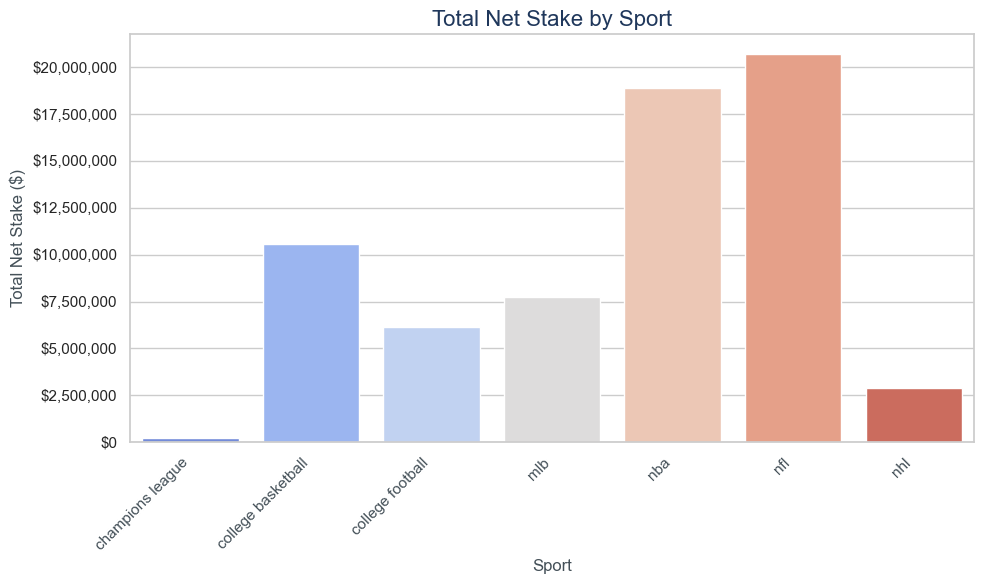

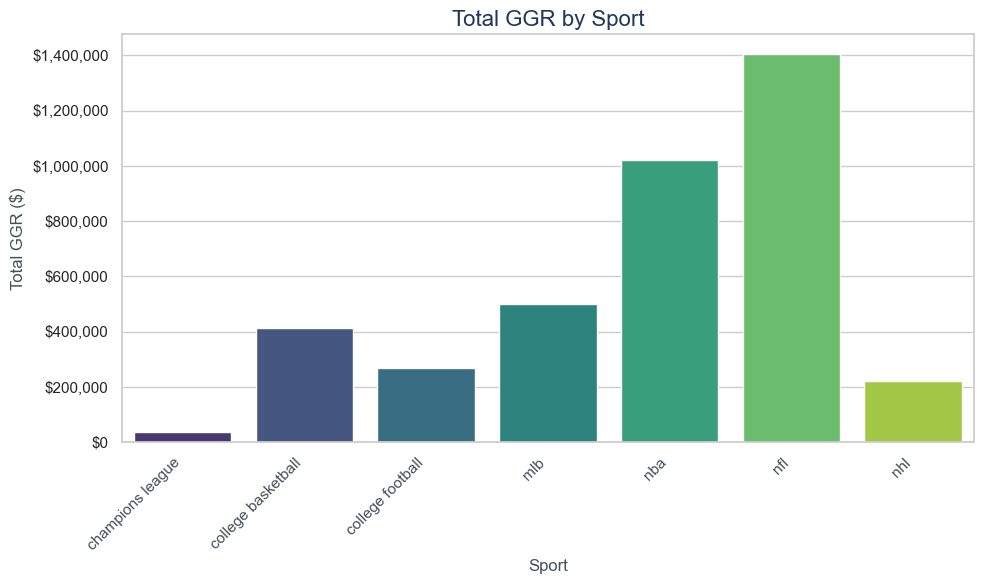

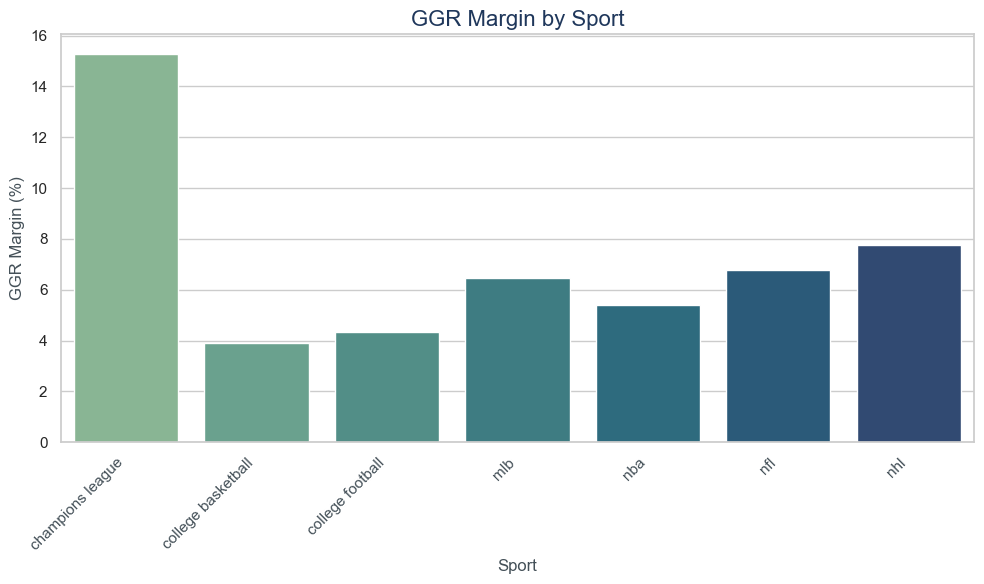

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Assuming 'total_by_sport' is the DataFrame you already created in your provided code

# Custom color palette based on the provided color codes
colors = {
    'headingTextColor': '#1F375B',
    'fanduelGreyD4': '#445058',
    'bodyTextColor': '#445058',
    'fanduelGreyD3': '#818E95',
    'subTextColor': '#818E95',
    'fanduelWhite': '#FFFFFF',
    'onDarkTextColor': '#FFFFFF',
    'fanduelBlueD1': '#1381E0',
    'linkColor': '#1381E0',
    'fanduelBlueD2': '#0E67B3',
    'linkHoverColor': '#0E67B3',
}

# Set up the style for the plots
sns.set(style="whitegrid")

# 1. Format the y-axis with dollar signs and commas
def format_dollars(x, pos):
    return f"${x:,.0f}"

# 2. Bar chart for Net Stake by Sport
plt.figure(figsize=(10, 6))
sns.barplot(data=total_by_sport, x='sportname', y='total_net_stake', palette=sns.color_palette("coolwarm", len(total_by_sport)))
plt.title('Total Net Stake by Sport', fontsize=16, color=colors['headingTextColor'])
plt.xlabel('Sport', fontsize=12, color=colors['bodyTextColor'])
plt.ylabel('Total Net Stake ($)', fontsize=12, color=colors['bodyTextColor'])
plt.xticks(rotation=45, ha='right', color=colors['bodyTextColor'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))  # Apply dollar formatting to y-axis
plt.tight_layout()
plt.show()

# 3. Bar chart for GGR by Sport
plt.figure(figsize=(10, 6))
sns.barplot(data=total_by_sport, x='sportname', y='total_ggr', palette=sns.color_palette("viridis", len(total_by_sport)))
plt.title('Total GGR by Sport', fontsize=16, color=colors['headingTextColor'])
plt.xlabel('Sport', fontsize=12, color=colors['bodyTextColor'])
plt.ylabel('Total GGR ($)', fontsize=12, color=colors['bodyTextColor'])
plt.xticks(rotation=45, ha='right', color=colors['bodyTextColor'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))  # Apply dollar formatting to y-axis
plt.tight_layout()
plt.show()

# 4. Bar chart for GGR Margin by Sport
plt.figure(figsize=(10, 6))
sns.barplot(data=total_by_sport, x='sportname', y='ggr_margin', palette=sns.color_palette("crest", len(total_by_sport)))
plt.title('GGR Margin by Sport', fontsize=16, color=colors['headingTextColor'])
plt.xlabel('Sport', fontsize=12, color=colors['bodyTextColor'])
plt.ylabel('GGR Margin (%)', fontsize=12, color=colors['bodyTextColor'])
plt.xticks(rotation=45, ha='right', color=colors['bodyTextColor'])
plt.tight_layout()
plt.show()



In [44]:
# Step 1: Calculate the number of legs per sport in each parlay
parlay['sport_count'] = parlay.groupby(['playerid_wagerid', 'sportname'])['sportname'].transform('count')

# Step 2: Allocate net_stake and ggr proportionally to each sport
parlay['allocated_net_stake'] = parlay['net_stake'] / parlay['sport_count']
parlay['allocated_ggr'] = parlay['ggr'] / parlay['sport_count']

# Step 3: Summarize by sport
parlay_summary = parlay.groupby('sportname').agg(
    total_allocated_net_stake=('allocated_net_stake', 'sum'),
    total_allocated_ggr=('allocated_ggr', 'sum')
).reset_index()

# Step 4: Calculate GGR margin for each sport
parlay_summary['ggr_margin'] = (
    (parlay_summary['total_allocated_ggr'] / parlay_summary['total_allocated_net_stake']) * 100
)

# Step 5: Format the totals and margins for each sport
parlay_summary['formatted_net_stake'] = parlay_summary['total_allocated_net_stake'].apply(lambda x: f"${x:,.2f}")
parlay_summary['formatted_ggr'] = parlay_summary['total_allocated_ggr'].apply(lambda x: f"${x:,.2f}")
parlay_summary['formatted_ggr_margin'] = parlay_summary['ggr_margin'].apply(lambda x: f"{x:.2f}%")

# Step 6: Calculate overall metrics (combined across all sports)
overall_net_stake = parlay_summary['total_allocated_net_stake'].sum()
overall_ggr = parlay_summary['total_allocated_ggr'].sum()
overall_ggr_margin = (overall_ggr / overall_net_stake) * 100

# Format the overall totals and margins
formatted_overall_net_stake = f"${overall_net_stake:,.2f}"
formatted_overall_ggr = f"${overall_ggr:,.2f}"
formatted_overall_ggr_margin = f"{overall_ggr_margin:.2f}%"

# Add a row for the overall totals
overall_summary = pd.DataFrame({
    'sportname': ['Overall'],
    'total_allocated_net_stake': [overall_net_stake],
    'total_allocated_ggr': [overall_ggr],
    'ggr_margin': [overall_ggr_margin],
    'formatted_net_stake': [formatted_overall_net_stake],
    'formatted_ggr': [formatted_overall_ggr],
    'formatted_ggr_margin': [formatted_overall_ggr_margin]
})

# Combine the sport-specific summary with the overall summary
parlay_summary = pd.concat([parlay_summary, overall_summary], ignore_index=True)

# Print the results by sport and the overall summary
print("Net stake, GGR, and GGR margin by sport for parlay bets:")
for _, row in parlay_summary.iterrows():
    print(f"Sport: {row['sportname']}, Total Allocated Net Stake: {row['formatted_net_stake']}, "
          f"Total Allocated GGR: {row['formatted_ggr']}, GGR Margin: {row['formatted_ggr_margin']}")


Net stake, GGR, and GGR margin by sport for parlay bets:
Sport: champions league, Total Allocated Net Stake: $69,268.85, Total Allocated GGR: $12,931.85, GGR Margin: 18.67%
Sport: college basketball, Total Allocated Net Stake: $1,300,851.72, Total Allocated GGR: $148,309.51, GGR Margin: 11.40%
Sport: college football, Total Allocated Net Stake: $706,447.08, Total Allocated GGR: $111,512.17, GGR Margin: 15.78%
Sport: mlb, Total Allocated Net Stake: $1,442,207.72, Total Allocated GGR: $241,067.53, GGR Margin: 16.72%
Sport: nba, Total Allocated Net Stake: $3,374,298.22, Total Allocated GGR: $625,616.79, GGR Margin: 18.54%
Sport: nfl, Total Allocated Net Stake: $3,681,555.15, Total Allocated GGR: $646,958.66, GGR Margin: 17.57%
Sport: nhl, Total Allocated Net Stake: $651,764.78, Total Allocated GGR: $118,515.81, GGR Margin: 18.18%
Sport: Overall, Total Allocated Net Stake: $11,226,393.52, Total Allocated GGR: $1,904,912.32, GGR Margin: 16.97%


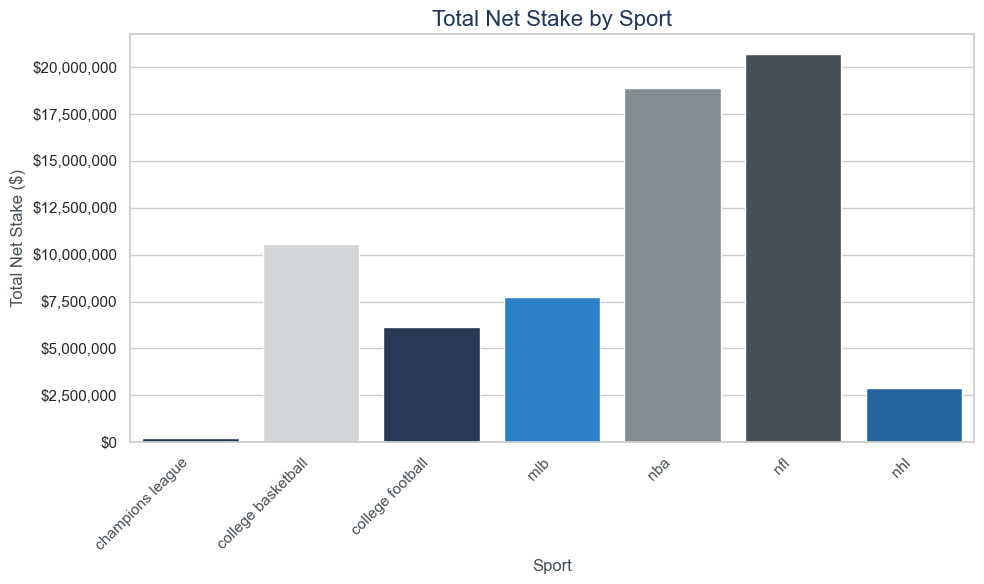

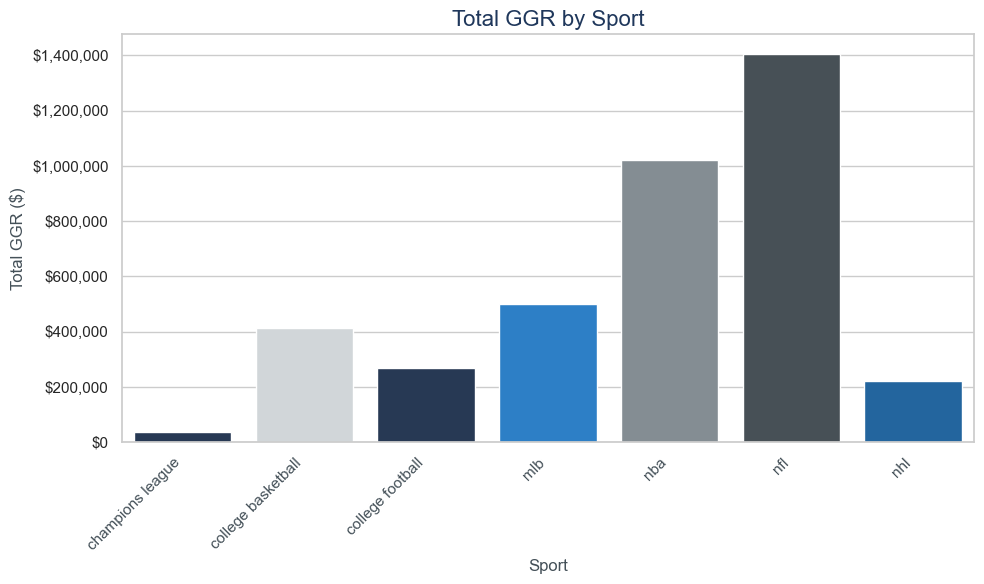

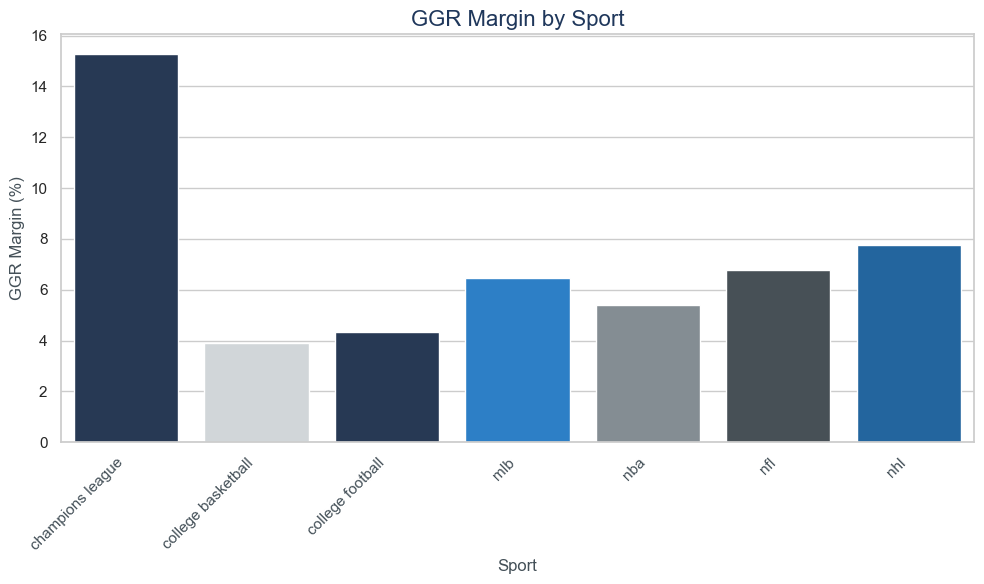

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Assuming 'total_by_sport' is the DataFrame you already created in your provided code

# Custom color palette based on the provided color codes
colors = {
    'headingTextColor': '#1F375B',
    'fanduelGreyD4': '#445058',
    'bodyTextColor': '#445058',
    'fanduelGreyD3': '#818E95',
    'subTextColor': '#818E95',
    'fanduelWhite': '#FFFFFF',
    'onDarkTextColor': '#FFFFFF',
    'fanduelBlueD1': '#1381E0',
    'linkColor': '#1381E0',
    'fanduelBlueD2': '#0E67B3',
    'linkHoverColor': '#0E67B3',
}

# Define custom color palette for each sport (ensuring consistency across charts)
sport_colors = {
    'mlb': '#1381E0',  # fanduelBlueD1
    'nhl': '#0E67B3',  # fanduelBlueD2
    'nfl': '#445058',  # fanduelGreyD4
    'nba': '#818E95',  # fanduelGreyD3
    'champions league': '#1F375B',  # headingTextColor (dark blue)
    'college basketball':'#CFD6DB',
    'college football':'#1F375B'
    # Add more sports and their respective colors if needed
}

# Normalize sport names to lowercase to match the keys in sport_colors
total_by_sport['normalized_sportname'] = total_by_sport['sportname'].str.lower()

# Set up the style for the plots
sns.set(style="whitegrid")

# 1. Format the y-axis with dollar signs and commas
def format_dollars(x, pos):
    return f"${x:,.0f}"

# 2. Bar chart for Net Stake by Sport
plt.figure(figsize=(10, 6))
sns.barplot(data=total_by_sport, x='sportname', y='total_net_stake',
            palette=[sport_colors.get(sport.lower(), '#FFFFFF') for sport in total_by_sport['sportname']])  # default color white if not found
plt.title('Total Net Stake by Sport', fontsize=16, color=colors['headingTextColor'])
plt.xlabel('Sport', fontsize=12, color=colors['bodyTextColor'])
plt.ylabel('Total Net Stake ($)', fontsize=12, color=colors['bodyTextColor'])
plt.xticks(rotation=45, ha='right', color=colors['bodyTextColor'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))  # Apply dollar formatting to y-axis
plt.tight_layout()
plt.show()

# 3. Bar chart for GGR by Sport
plt.figure(figsize=(10, 6))
sns.barplot(data=total_by_sport, x='sportname', y='total_ggr',
            palette=[sport_colors.get(sport.lower(), '#FFFFFF') for sport in total_by_sport['sportname']])  # default color white if not found
plt.title('Total GGR by Sport', fontsize=16, color=colors['headingTextColor'])
plt.xlabel('Sport', fontsize=12, color=colors['bodyTextColor'])
plt.ylabel('Total GGR ($)', fontsize=12, color=colors['bodyTextColor'])
plt.xticks(rotation=45, ha='right', color=colors['bodyTextColor'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))  # Apply dollar formatting to y-axis
plt.tight_layout()
plt.show()

# 4. Bar chart for GGR Margin by Sport
plt.figure(figsize=(10, 6))
sns.barplot(data=total_by_sport, x='sportname', y='ggr_margin',
            palette=[sport_colors.get(sport.lower(), '#FFFFFF') for sport in total_by_sport['sportname']])  # default color white if not found
plt.title('GGR Margin by Sport', fontsize=16, color=colors['headingTextColor'])
plt.xlabel('Sport', fontsize=12, color=colors['bodyTextColor'])
plt.ylabel('GGR Margin (%)', fontsize=12, color=colors['bodyTextColor'])
plt.xticks(rotation=45, ha='right', color=colors['bodyTextColor'])
plt.tight_layout()
plt.show()




In [46]:
import pandas as pd

# ----------- PARLAY BETS -----------

# Step 1: Calculate the number of legs per sport in each parlay
parlay['sport_count'] = parlay.groupby(['playerid_wagerid', 'sportname'])['sportname'].transform('count')

# Step 2: Allocate net_stake and GGR proportionally to each sport
parlay['allocated_net_stake'] = parlay['net_stake'] / parlay['sport_count']
parlay['allocated_ggr'] = parlay['ggr'] / parlay['sport_count']

# Step 3: Summarize by sport for parlays
parlay_summary = parlay.groupby('sportname').agg(
    total_allocated_net_stake=('allocated_net_stake', 'sum'),
    total_allocated_ggr=('allocated_ggr', 'sum')
).reset_index()

# Step 4: Calculate GGR margin for each sport in parlays
parlay_summary['ggr_margin'] = (
    (parlay_summary['total_allocated_ggr'] / parlay_summary['total_allocated_net_stake']) * 100
)

# Rename columns for clarity in combination
parlay_summary.rename(columns={
    'total_allocated_net_stake': 'total_net_stake',
    'total_allocated_ggr': 'total_ggr'
}, inplace=True)

# ----------- STRAIGHT BETS -----------

# Step 1: Summarize by sport for straight bets
straight_summary = straight.groupby('sportname').agg(
    total_net_stake=('net_stake', 'sum'),
    total_ggr=('ggr', 'sum')
).reset_index()

# Step 2: Calculate GGR margin for straight bets
straight_summary['ggr_margin'] = (straight_summary['total_ggr'] / straight_summary['total_net_stake']) * 100

# ----------- COMBINED REPORT -----------

# Combine parlay and straight summaries by sport
combined_summary = pd.concat([parlay_summary, straight_summary]).groupby('sportname').agg(
    total_net_stake=('total_net_stake', 'sum'),
    total_ggr=('total_ggr', 'sum'),
    ggr_margin=('ggr_margin', 'mean')  # Average GGR margin across both bet types
).reset_index()

# Calculate GGR margin for combined totals by sport
combined_summary['ggr_margin'] = (
    (combined_summary['total_ggr'] / combined_summary['total_net_stake']) * 100
)

# Format the combined totals
combined_summary['formatted_net_stake'] = combined_summary['total_net_stake'].apply(lambda x: f"${x:,.2f}")
combined_summary['formatted_ggr'] = combined_summary['total_ggr'].apply(lambda x: f"${x:,.2f}")
combined_summary['formatted_ggr_margin'] = combined_summary['ggr_margin'].apply(lambda x: f"{x:.2f}%")

# ----------- OVERALL TOTALS -----------

# Calculate overall metrics across all sports and bet types
overall_net_stake = combined_summary['total_net_stake'].sum()
overall_ggr = combined_summary['total_ggr'].sum()
overall_ggr_margin = (overall_ggr / overall_net_stake) * 100

# Format overall totals
formatted_overall_net_stake = f"${overall_net_stake:,.2f}"
formatted_overall_ggr = f"${overall_ggr:,.2f}"
formatted_overall_ggr_margin = f"{overall_ggr_margin:.2f}%"

# Add overall row to the combined summary
overall_row = pd.DataFrame({
    'sportname': ['Overall'],
    'total_net_stake': [overall_net_stake],
    'total_ggr': [overall_ggr],
    'ggr_margin': [overall_ggr_margin],
    'formatted_net_stake': [formatted_overall_net_stake],
    'formatted_ggr': [formatted_overall_ggr],
    'formatted_ggr_margin': [formatted_overall_ggr_margin]
})

final_summary = pd.concat([combined_summary, overall_row], ignore_index=True)

# ----------- DISPLAY FINAL REPORT -----------

print("\n--- Combined Summary of Parlay and Straight Bets ---")
print(final_summary[['sportname', 'formatted_net_stake', 'formatted_ggr', 'formatted_ggr_margin']])



--- Combined Summary of Parlay and Straight Bets ---
            sportname formatted_net_stake  formatted_ggr formatted_ggr_margin
0    champions league         $313,136.95     $50,204.18               16.03%
1  college basketball      $11,851,749.37    $561,941.85                4.74%
2    college football       $6,862,627.80    $379,037.29                5.52%
3                 mlb       $9,196,087.19    $742,098.02                8.07%
4                 nba      $22,270,890.02  $1,645,995.17                7.39%
5                 nfl      $24,377,624.02  $2,052,346.42                8.42%
6                 nhl       $3,532,661.93    $341,724.58                9.67%
7             Overall      $78,404,777.28  $5,773,347.50                7.36%


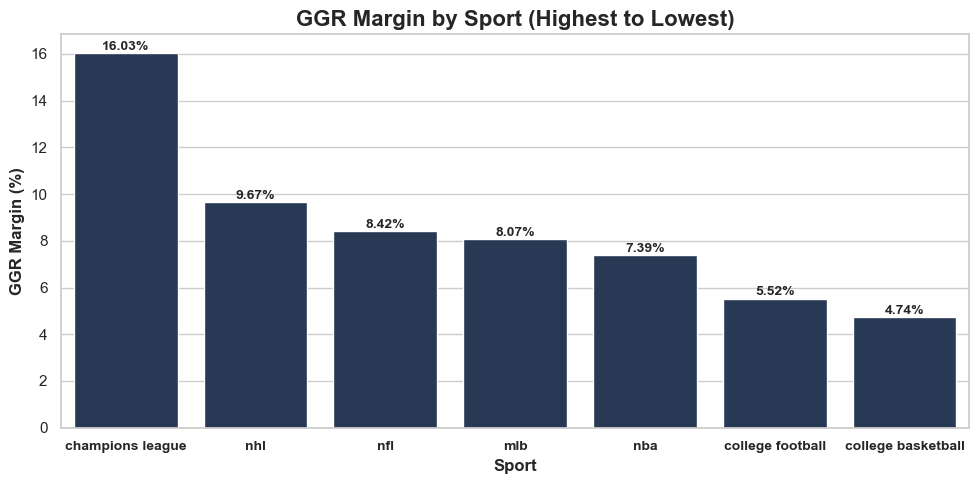

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the last row (overall summary) and sort by GGR Margin
ggr_margin_sorted = final_summary.iloc[:-1].sort_values('ggr_margin', ascending=False)

# Set up the plot style
sns.set_style("whitegrid")
color = '#1F375B'  # Using the provided color for bars

# Create the vertical bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='sportname', 
    y='ggr_margin', 
    data=ggr_margin_sorted, 
    palette=[color] * len(ggr_margin_sorted)  # Apply a single color
)

# Add data labels to each bar
for index, value in enumerate(ggr_margin_sorted['ggr_margin']):
    ax.text(
        index, value + 0.01,  # Position labels slightly above the bars
        f"{value:.2f}%",  # Label showing the GGR Margin percentage
        ha='center', va='bottom', fontsize=10, weight='bold'
    )

# If you want to add date labels, assuming you have a 'date' column or other date-related info
# Uncomment below code if you have a relevant 'date' column

# for index, row in ggr_margin_sorted.iterrows():
#     ax.text(
#         index, value - 0.05,  # Adjust position as necessary
#         f"Date: {row['date_column_name']}",  # Adjust column name as necessary
#         ha='center', va='bottom', fontsize=9, style='italic', color='gray'
#     )

# Add titles and labels
plt.title("GGR Margin by Sport (Highest to Lowest)", fontsize=16, weight='bold')
plt.xlabel("Sport", fontsize=12, weight='bold')
plt.ylabel("GGR Margin (%)", fontsize=12, weight='bold')

# Make x-axis labels bold
plt.xticks(fontsize=10, fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [ ]:
######################
# Customer Journey and Engagement
######################

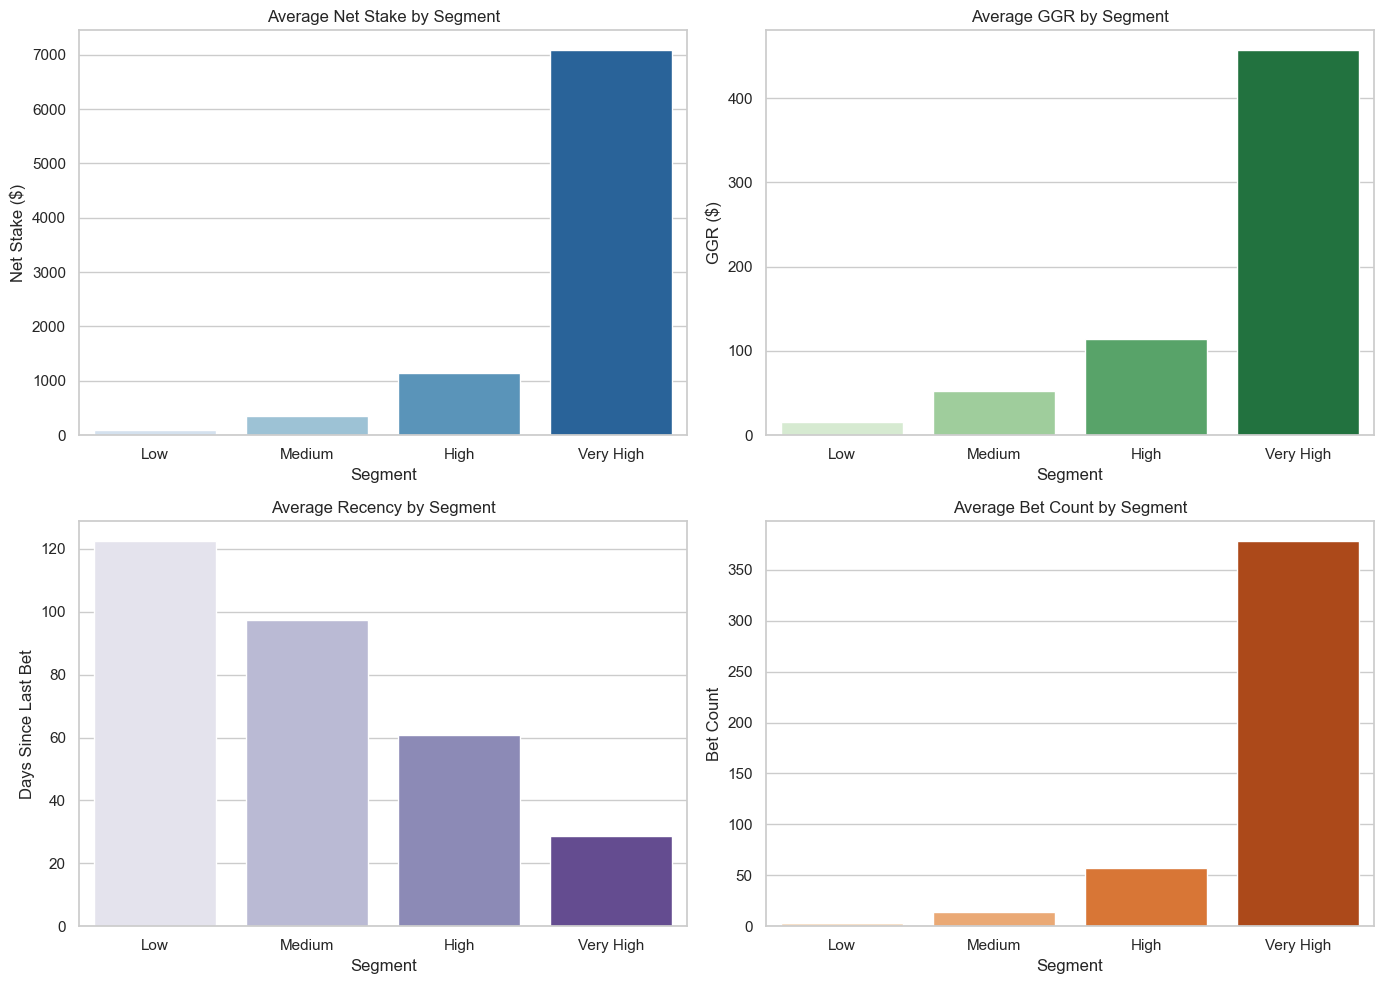

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'placed_date' is in datetime format
final_df['placed_date'] = pd.to_datetime(final_df['placed_date'])

# Step 1: Calculate engagement metrics per player
player_metrics = final_df.groupby('playerid').agg({
    'allocated_net_stake': 'sum',        # Total net stake
    'allocated_ggr': 'sum',              # Total GGR
    'wagerid': 'count',        # Frequency of bets
    'placed_date': 'max'       # Most recent bet
}).rename(columns={'wagerid': 'bet_count'})

# Step 2: Calculate recency in days
latest_date = final_df['placed_date'].max()
player_metrics['recency'] = (latest_date - player_metrics['placed_date']).dt.days

# Step 3: Segment players by bet frequency
player_metrics['segment'] = pd.qcut(player_metrics['bet_count'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Step 4: Aggregate metrics by segment
segment_analysis = player_metrics.groupby('segment').agg({
    'allocated_net_stake': 'mean',  # Average net stake
    'allocated_ggr': 'mean',        # Average GGR
    'recency': 'mean',    # Average recency
    'bet_count': 'mean'   # Average bet count
}).reset_index()

# Step 5: Visualize the segments
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(data=segment_analysis, x='segment', y='allocated_net_stake', ax=ax[0, 0], palette='Blues')
ax[0, 0].set_title('Average Net Stake by Segment')
ax[0, 0].set_ylabel('Net Stake ($)')
ax[0, 0].set_xlabel('Segment')

sns.barplot(data=segment_analysis, x='segment', y='allocated_ggr', ax=ax[0, 1], palette='Greens')
ax[0, 1].set_title('Average GGR by Segment')
ax[0, 1].set_ylabel('GGR ($)')
ax[0, 1].set_xlabel('Segment')

sns.barplot(data=segment_analysis, x='segment', y='recency', ax=ax[1, 0], palette='Purples')
ax[1, 0].set_title('Average Recency by Segment')
ax[1, 0].set_ylabel('Days Since Last Bet')
ax[1, 0].set_xlabel('Segment')

sns.barplot(data=segment_analysis, x='segment', y='bet_count', ax=ax[1, 1], palette='Oranges')
ax[1, 1].set_title('Average Bet Count by Segment')
ax[1, 1].set_ylabel('Bet Count')
ax[1, 1].set_xlabel('Segment')

plt.tight_layout()
plt.show()


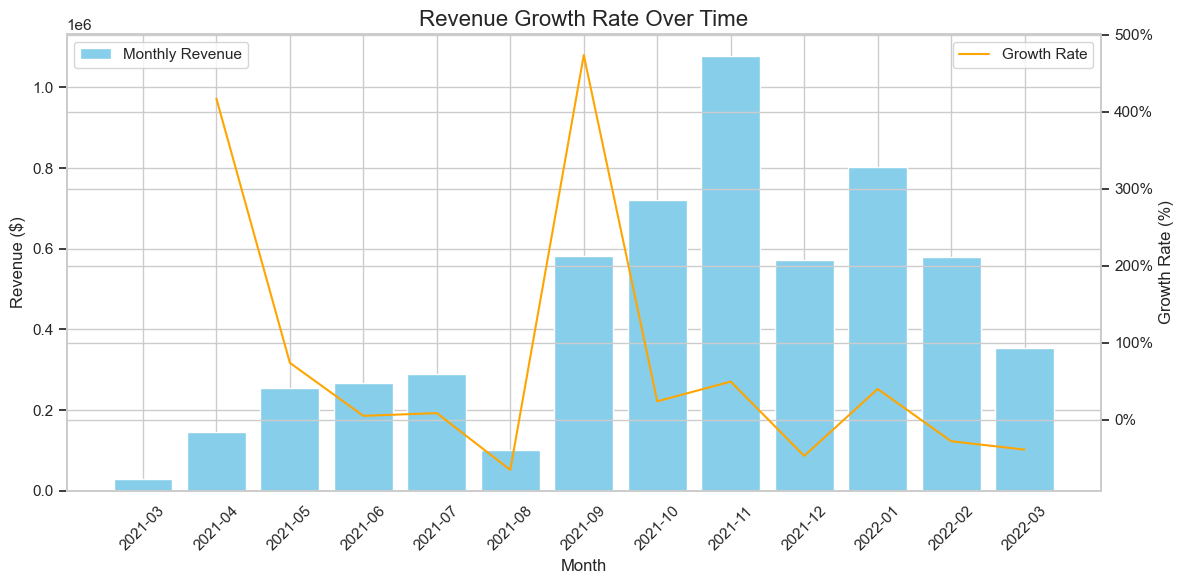

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is loaded in a DataFrame called final_df
# Ensure placed_date is in datetime format
final_df['placed_date'] = pd.to_datetime(final_df['placed_date'])

# Group data by month
final_df['month'] = final_df['placed_date'].dt.to_period('M')
monthly_revenue = final_df.groupby('month')['allocated_ggr'].sum()

# Calculate growth rate
monthly_revenue = monthly_revenue.reset_index()
monthly_revenue['growth_rate'] = monthly_revenue['allocated_ggr'].pct_change()

# Plot revenue and growth rate
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot monthly revenue
ax1.bar(monthly_revenue['month'].astype(str), monthly_revenue['allocated_ggr'], color='skyblue', label='Monthly Revenue')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Plot growth rate
ax2 = ax1.twinx()
ax2.plot(monthly_revenue['month'].astype(str), monthly_revenue['growth_rate'], color='orange', label='Growth Rate')
ax2.set_ylabel('Growth Rate (%)', fontsize=12)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0%}"))
ax2.legend(loc='upper right')

# Add title
plt.title('Revenue Growth Rate Over Time', fontsize=16)

plt.tight_layout()
plt.show()


In [50]:
monthly_revenue

,month,allocated_ggr,growth_rate
0,2021-03,2.823701e+04,NaN
1,2021-04,1.459519e+05,4.168818
2,2021-05,2.538581e+05,0.739327
3,2021-06,2.668966e+05,0.051362
4,2021-07,2.900085e+05,0.086595
5,2021-08,1.013273e+05,-0.650606
6,2021-09,5.810127e+05,4.734020
7,2021-10,7.203017e+05,0.239735
8,2021-11,1.077610e+06,0.496054
9,2021-12,5.726248e+05,-0.468616


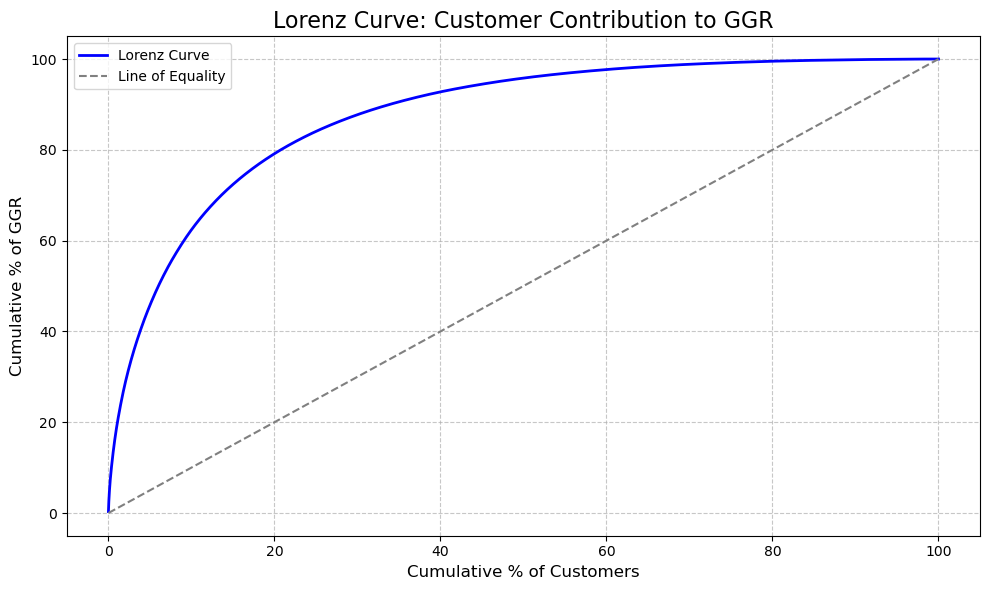

6.02% of customers generate 50% of the GGR.
20.77% of customers generate 80% of the GGR.
33.88% of customers generate 90% of the GGR.
71.90% of customers generate 99% of the GGR.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate total GGR per customer
customer_ggr = final_df.groupby('playerid')['allocated_ggr'].sum().reset_index()

# Step 2: Drop players with negative GGR
customer_ggr = customer_ggr[customer_ggr['allocated_ggr'] >= 0]

# Step 3: Rank customers by GGR and calculate cumulative GGR percentage
customer_ggr = customer_ggr.sort_values(by='allocated_ggr', ascending=False).reset_index(drop=True)
customer_ggr['cumulative_ggr'] = customer_ggr['allocated_ggr'].cumsum()
total_ggr = customer_ggr['allocated_ggr'].sum()  # Total GGR for normalization
customer_ggr['cumulative_ggr_percentage'] = customer_ggr['cumulative_ggr'] / total_ggr * 100

# Step 4: Calculate cumulative customer percentage
total_customers = len(customer_ggr)  # Total number of customers for normalization
customer_ggr['customer_rank'] = np.arange(1, len(customer_ggr) + 1)
customer_ggr['cumulative_customer_percentage'] = customer_ggr['customer_rank'] / total_customers * 100

# Step 5: Ensure percentages are capped at 100
customer_ggr['cumulative_ggr_percentage'] = customer_ggr['cumulative_ggr_percentage'].clip(upper=100)
customer_ggr['cumulative_customer_percentage'] = customer_ggr['cumulative_customer_percentage'].clip(upper=100)

# Step 6: Plot Lorenz Curve
fig, ax = plt.subplots(figsize=(10, 6))

# Plot cumulative GGR vs. cumulative customers
ax.plot(customer_ggr['cumulative_customer_percentage'], customer_ggr['cumulative_ggr_percentage'], label='Lorenz Curve', color='blue', lw=2)

# Add line of equality
ax.plot([0, 100], [0, 100], label='Line of Equality', color='gray', linestyle='--')

# Title and Labels
ax.set_title('Lorenz Curve: Customer Contribution to GGR', fontsize=16)
ax.set_xlabel('Cumulative % of Customers', fontsize=12)
ax.set_ylabel('Cumulative % of GGR', fontsize=12)

# Grid and Legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

# Step 7: Insights
thresholds = [50, 80, 90, 99]
for t in thresholds:
    customer_cutoff = customer_ggr[customer_ggr['cumulative_ggr_percentage'] >= t].iloc[0]['cumulative_customer_percentage']
    print(f"{customer_cutoff:.2f}% of customers generate {t}% of the GGR.")


In [46]:
# State-wise GGR contribution for high-value customers
high_value_customers = customer_ggr[customer_ggr['cumulative_customer_percentage'] <= 20.77]
top_customers_df = final_df[final_df['playerid'].isin(high_value_customers['playerid'])]

state_ggr = top_customers_df.groupby('state')['allocated_ggr'].sum().reset_index()
state_ggr['ggr_percentage'] = (state_ggr['allocated_ggr'] / state_ggr['allocated_ggr'].sum()) * 100

# print(state_ggr.sort_values('ggr_percentage', ascending=False))
state_ggr

,state,allocated_ggr,ggr_percentage
0,State1,1.621519e+06,23.053857
1,State2,3.320841e+06,47.213884
2,State3,2.091251e+06,29.732259


In [48]:
# Analyze GGR contribution by sport
sport_ggr = top_customers_df.groupby('sportname')['allocated_ggr'].sum().reset_index()
sport_ggr['ggr_percentage'] = (sport_ggr['allocated_ggr'] / sport_ggr['allocated_ggr'].sum()) * 100

print(sport_ggr.sort_values('ggr_percentage', ascending=False))


            sportname  allocated_ggr  ggr_percentage
5                 nfl   2.428183e+06       34.522561
4                 nba   2.028712e+06       28.843107
3                 mlb   8.819070e+05       12.538467
1  college basketball   8.225273e+05       11.694239
2    college football   4.911038e+05        6.982243
6                 nhl   3.378201e+05        4.802940
0    champions league   4.335809e+04        0.616441


In [49]:
# Bet type preferences
bet_type_ggr = top_customers_df.groupby(['bet_type', 'result'])['allocated_ggr'].sum().reset_index()
bet_type_ggr['ggr_percentage'] = (bet_type_ggr['allocated_ggr'] / bet_type_ggr['allocated_ggr'].sum()) * 100

print(bet_type_ggr.sort_values('ggr_percentage', ascending=False))


   bet_type result  allocated_ggr  ggr_percentage
2  straight   lost   2.050732e+07      291.561716
0    parlay   lost   4.817641e+06       68.494569
1    parlay    won  -3.085142e+06      -43.862847
3  straight    won  -1.520620e+07     -216.193439


In [51]:
# Average stake size
stake_analysis = top_customers_df.groupby('playerid')['allocated_net_stake'].mean().reset_index()
stake_analysis['ggr'] = top_customers_df.groupby('playerid')['allocated_ggr'].sum().reset_index()['allocated_ggr']
stake_analysis['stake_to_ggr_ratio'] = stake_analysis['allocated_net_stake'] / stake_analysis['ggr']

stake_analysis


,playerid,allocated_net_stake,ggr,stake_to_ggr_ratio
0,10013683,15.547993,1237.604733,0.012563
1,10019956,12.125190,554.063884,0.021884
2,10034000,38.788214,879.680000,0.044094
3,10037678,38.751501,1792.276658,0.021621
4,10044827,10.904195,534.305554,0.020408
...,...,...,...,...
5603,990316,113.190000,375.040000,0.301808
5604,9942742,14.258238,3031.395052,0.004704
5605,994311,131.936756,396.333333,0.332893
5606,9949574,28.920755,1099.550000,0.026302


In [52]:
# Analyze GGR by session phase
phase_ggr = top_customers_df.groupby('phase')['allocated_ggr'].sum().reset_index()
phase_ggr['ggr_percentage'] = (phase_ggr['allocated_ggr'] / phase_ggr['allocated_ggr'].sum()) * 100

print(phase_ggr.sort_values('ggr_percentage', ascending=False))


   phase  allocated_ggr  ggr_percentage
1  later   4.051629e+06       57.603834
0  early   2.981981e+06       42.396166


In [55]:
# Analyze multi-leg bet behavior
multi_leg_analysis = top_customers_df.groupby('playerid_wagerid')['legresult'].nunique().reset_index(name='unique_legs')
multi_leg_summary = multi_leg_analysis['unique_legs'].value_counts().reset_index()
multi_leg_summary.columns = ['number_of_legs', 'count']

multi_leg_summary


,number_of_legs,count
0,1,904799
1,2,226493


In [57]:
# First and most recent bet analysis
customer_journey = top_customers_df.groupby('playerid').agg(
    first_bet=('placed_date', 'min'),
    recent_bet=('placed_date', 'max'),
    total_bets=('total_bets', 'sum'),
    total_ggr=('allocated_ggr', 'sum')
).reset_index()

customer_journey


,playerid,first_bet,recent_bet,total_bets,total_ggr
0,10013683,2022-02-06,2022-03-28,237160,1237.604733
1,10019956,2021-04-27,2021-10-03,21000,554.063884
2,10034000,2022-01-15,2022-03-27,1176,879.680000
3,10037678,2022-02-09,2022-03-25,31524,1792.276658
4,10044827,2021-09-09,2022-02-13,588,534.305554
...,...,...,...,...,...
5603,990316,2021-09-09,2021-09-11,25,375.040000
5604,9942742,2021-06-07,2022-03-18,187902,3031.395052
5605,994311,2021-05-06,2022-03-17,4500,396.333333
5606,9949574,2021-05-22,2022-03-26,9222,1099.550000


In [59]:
# Correlation between key variables
correlation_data = top_customers_df[['allocated_ggr', 'allocated_net_stake', 'total_bets', 'sport_count']]
correlation_matrix = correlation_data.corr()

correlation_matrix


,allocated_ggr,allocated_net_stake,total_bets,sport_count
allocated_ggr,1.000000,0.271245,-0.019254,-0.025196
allocated_net_stake,0.271245,1.000000,-0.017343,-0.180783
total_bets,-0.019254,-0.017343,1.000000,-0.268395
sport_count,-0.025196,-0.180783,-0.268395,1.000000


In [60]:
# Compare metrics between 6% and 20% segments
ultra_high_value = customer_ggr[customer_ggr['cumulative_customer_percentage'] <= 6.02]
moderate_high_value = customer_ggr[(customer_ggr['cumulative_customer_percentage'] > 6.02) & (customer_ggr['cumulative_customer_percentage'] <= 20.77)]

comparison = {
    'Segment': ['Top 6%', 'Top 20%'],
    'Average GGR': [ultra_high_value['allocated_ggr'].mean(), moderate_high_value['allocated_ggr'].mean()],
    'Average Bets': [top_customers_df[top_customers_df['playerid'].isin(ultra_high_value['playerid'])]['total_bets'].mean(),
                     top_customers_df[top_customers_df['playerid'].isin(moderate_high_value['playerid'])]['total_bets'].mean()]
}

print(pd.DataFrame(comparison))


   Segment  Average GGR  Average Bets
0   Top 6%  2704.413999    624.715960
1  Top 20%   662.550296    368.932874


In [ ]:
###################
# Historical CLV
###################

Average CLV across all customers: $38.33
Median CLV across all customers: $34.35
Top 10% CLV threshold: $140.00
Number of high-value customers: 3626


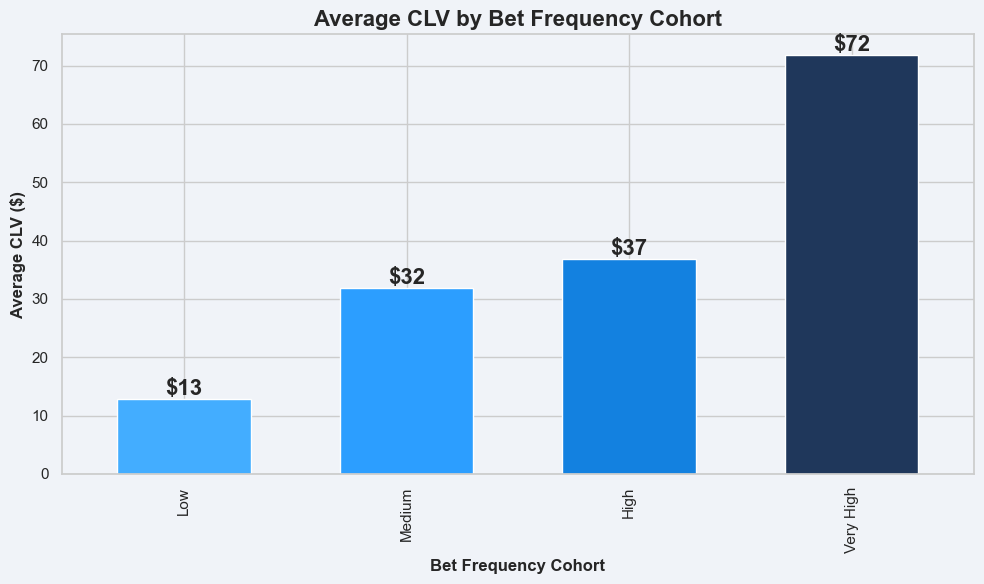

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Aggregate GGR and calculate customer lifetime metrics
customer_lifetime = final_df.groupby('playerid').agg({
    'allocated_ggr': 'sum',  # Total GGR per customer
    'placed_date': [min, max],  # First and last betting dates
    'playerid_wagerid': 'count'  # Number of bets per customer
}).reset_index()

# Rename columns for convenience
customer_lifetime.columns = ['playerid', 'total_ggr', 'first_date', 'last_date', 'bet_count']

# Step 2: Calculate customer lifetime in months
customer_lifetime['lifetime_months'] = (
    (customer_lifetime['last_date'] - customer_lifetime['first_date']).dt.days / 30
).clip(lower=1)  # Ensure minimum of 1 month

# Step 3: Calculate CLV (total GGR / lifetime)
customer_lifetime['clv'] = customer_lifetime['total_ggr'] / customer_lifetime['lifetime_months']

# Step 4: Divide customers into cohorts based on the frequency of their bets
customer_lifetime['bet_cohort'] = pd.qcut(customer_lifetime['bet_count'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Step 5: Calculate average CLV for each cohort
cohort_clv = customer_lifetime.groupby('bet_cohort').agg({
    'clv': 'mean',
    'bet_count': 'mean',  # Average bet frequency for each cohort
    'total_ggr': 'mean',  # Average GGR for each cohort
    'playerid': 'count'  # Count of customers in each cohort
}).rename(columns={'playerid': 'customer_count'})

# Print cohort CLV summary
# print(cohort_clv)


average_clv = cohort_clv['clv'].mean()
median_clv = cohort_clv['clv'].median()

# Print insights
print(f"Average CLV across all customers: ${average_clv:,.2f}")
print(f"Median CLV across all customers: ${median_clv:,.2f}")

# Identify high-value customers (top 10%)
top_10_clv_threshold = customer_lifetime['clv'].quantile(0.9)
high_value_customers = customer_lifetime[customer_lifetime['clv'] > top_10_clv_threshold]
print(f"Top 10% CLV threshold: ${top_10_clv_threshold:,.2f}")
print(f"Number of high-value customers: {len(high_value_customers)}")


# Step 6: Visualize CLV Distribution by Cohort

# # Create a subplot for CLV distribution by cohort
# fig, ax = plt.subplots(figsize=(12, 8))

# # Plot CLV distribution for each cohort
# for cohort in cohort_clv.index:
#     cohort_data = customer_lifetime[customer_lifetime['bet_cohort'] == cohort]
#     ax.hist(cohort_data['clv'], bins=30, alpha=0.7, label=f'{cohort} (n={len(cohort_data)})')

# # Add titles and labels
# ax.set_title('Customer Lifetime Value (CLV) Distribution by Bet Frequency Cohort', fontsize=16)
# ax.set_xlabel('Customer Lifetime Value ($)', fontsize=12)
# ax.set_ylabel('Frequency', fontsize=12)

# # Add legend
# ax.legend(title="Cohorts", loc='upper right')

# # Display the plot
# plt.tight_layout()
# plt.show()

# Optional: You could also plot the mean CLV for each cohort as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

cohort_clv['clv'].plot(kind='bar', ax=ax, color=['#43ADFF', '#2C9EFF', '#1381E0', '#1F375B'], width=0.6)

# Add titles and labels
ax.set_title('Average CLV by Bet Frequency Cohort', fontsize=16, fontweight='bold')
ax.set_xlabel('Bet Frequency Cohort', fontsize=12, fontweight='bold')
ax.set_ylabel('Average CLV ($)', fontsize=12, fontweight='bold')

# Add data labels
for i, clv in enumerate(cohort_clv['clv']):
    ax.text(i, clv + 0.01, f"${clv:,.0f}", ha='center', va='bottom', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
#################
# Retention Rates
#################

Retention Rate by Bet Frequency Cohort:
cohort_period     0          1          2          3          4          5   \
bet_cohort                                                                    
Low            100.0   5.330621   2.685656   1.861648   1.251272   1.088505   
Medium         100.0  29.360499  19.079025  14.262160  11.612295   9.245083   
High           100.0  61.083081  48.021079  40.688418  36.450275  34.869380   
Very High      100.0  82.606301  77.153558  72.229566  67.602996  71.965191   

cohort_period         6          7          8          9          10  \
bet_cohort                                                             
Low             0.610376   0.447609   0.223805   0.284842   0.162767   
Medium          6.312566   4.239783   3.438935   3.062066   2.508538   
High           27.682476  18.376500  15.954703  14.811077  12.501402   
Very High      64.044944  47.179996  42.586473  38.973342  34.853492   

cohort_period         11         12  
bet_cohort    

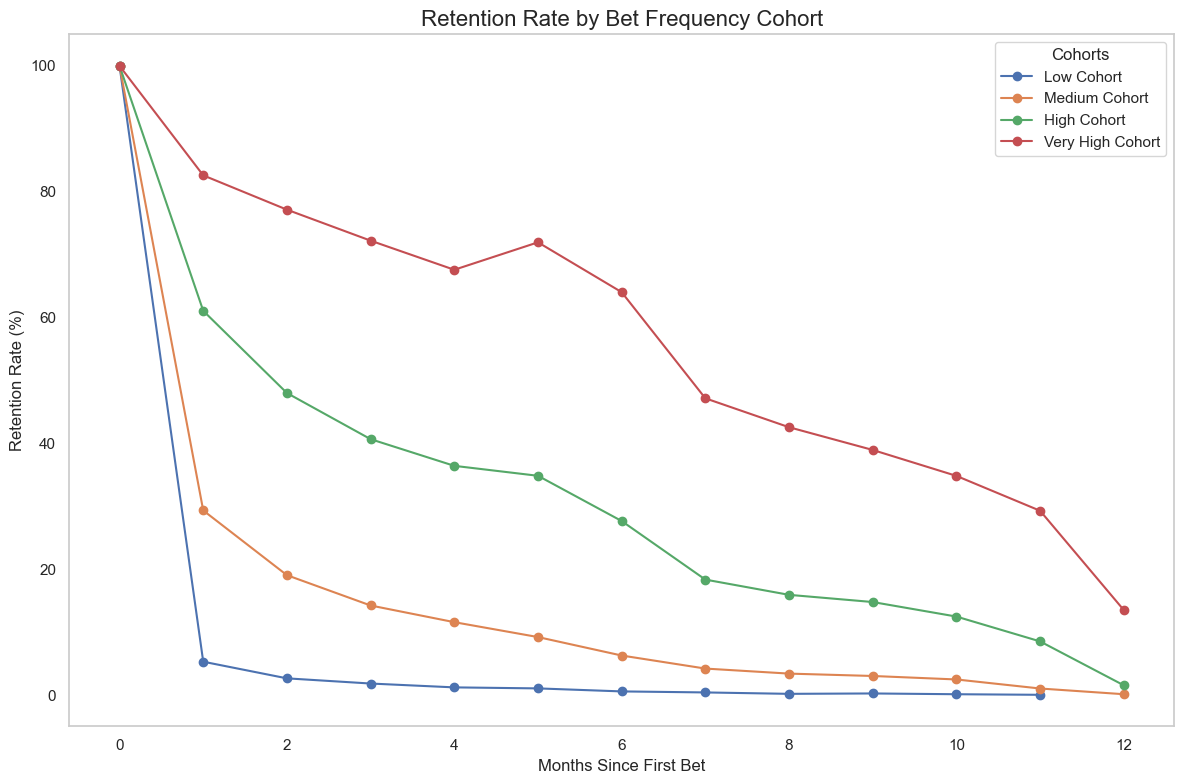

In [53]:
import pandas as pd
import numpy as np

# Step 1: Prepare Data - Calculate customer-level metrics
customer_metrics = final_df.groupby('playerid').agg({
    'placed_date': [min, max],  # First and last betting dates
    'wagerid': 'count'  # Number of bets placed by each customer
}).reset_index()

# Rename columns for convenience
customer_metrics.columns = ['playerid', 'first_bet_date', 'last_bet_date', 'bet_count']

# Step 2: Create cohorts based on bet frequency
customer_metrics['bet_cohort'] = pd.qcut(customer_metrics['bet_count'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Merge cohort info back into the main dataset
final_df = final_df.merge(customer_metrics[['playerid', 'bet_cohort', 'first_bet_date']], on='playerid')

# Step 3: Create a cohort-based retention matrix
# Assign cohort periods (months since first bet)
final_df['cohort_period'] = ((final_df['placed_date'] - final_df['first_bet_date']).dt.days // 30).clip(lower=0)

# Create retention matrix
retention_matrix = final_df.pivot_table(
    index='bet_cohort',
    columns='cohort_period',
    values='playerid',
    aggfunc=pd.Series.nunique  # Count unique players active in each cohort period
)

# Calculate retention rate by dividing each value by the size of the cohort
cohort_sizes = retention_matrix.iloc[:, 0]
retention_rate = retention_matrix.divide(cohort_sizes, axis=0) * 100  # Convert to percentage

# Step 4: Print results
print("Retention Rate by Bet Frequency Cohort:")
print(retention_rate)

# Step 5: Visualize Retention Rate
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

# Plot retention rates for each cohort
for cohort in retention_rate.index:
    ax.plot(retention_rate.columns, retention_rate.loc[cohort], marker='o', label=f'{cohort} Cohort')

# Add titles and labels
ax.set_title('Retention Rate by Bet Frequency Cohort', fontsize=16)
ax.set_xlabel('Months Since First Bet', fontsize=12)
ax.set_ylabel('Retention Rate (%)', fontsize=12)
ax.legend(title="Cohorts", loc='upper right')

# Display the plot
plt.grid()
plt.tight_layout()
plt.show()


In [54]:
# overall_average_retention = retention_rate.mean().mean()
retention_rate.mean(axis=1)

bet_cohort
Low           9.501526
Medium       15.719812
High         32.351850
Very High    57.080516
dtype: float64

In [ ]:
#################
# Predictive CLV
#################

In [ ]:
['bet_count']

           total_net_stake   total_ggr  lifetime_months  retention_rate  \
cohort                                                                    
Low              98.539887   15.547097         1.091512        0.095015   
Medium          343.862343   52.984398         2.454501        0.157198   
High           1135.546372  113.892570         5.135079        0.323518   
Very High      7092.802043  457.680236         7.846761        0.570805   

           customer_count       ARPP        CLV  
cohort                                           
Low                  9830  14.243629   1.495453  
Medium               8491  21.586629   4.026305  
High                 8919  22.179323  10.606974  
Very High            9078  58.327278  77.572022  


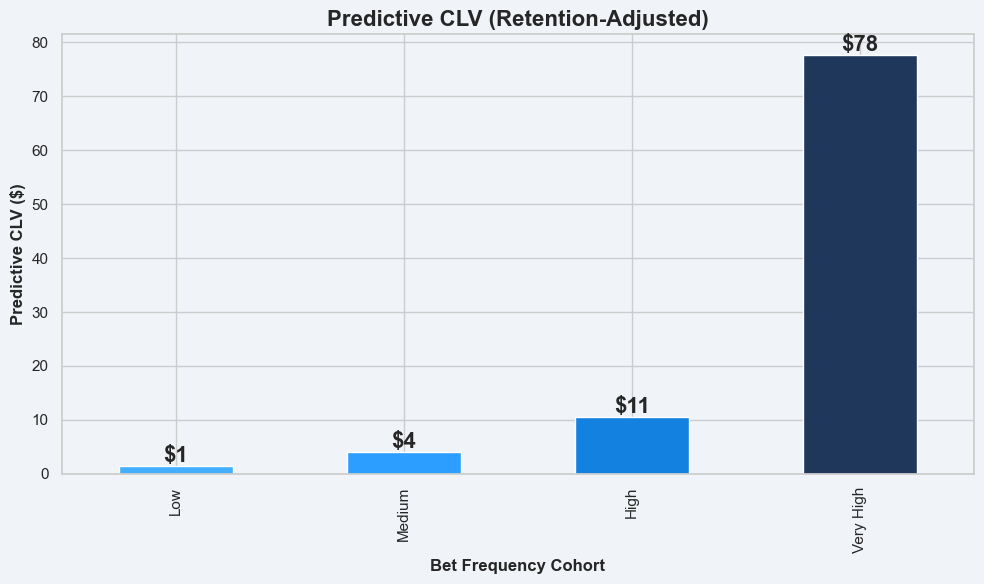

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate total net staking and GGR for each customer
customer_metrics = final_df.groupby('playerid').agg({
    'allocated_net_stake': 'sum',
    'allocated_ggr': 'sum',
    'placed_date': ['min', 'max'],
    'playerid_wagerid': 'count'# To calculate lifetime
}).reset_index()

# Rename columns for clarity
customer_metrics.columns = ['playerid', 'total_net_stake', 'total_ggr', 'first_bet_date', 'last_bet_date', 'bet_count']

# Calculate lifetime in months (approximation)
customer_metrics['lifetime_months'] = (pd.to_datetime(customer_metrics['last_bet_date']) - 
                                       pd.to_datetime(customer_metrics['first_bet_date'])).dt.days / 30

# Handle division by zero for customers with only one bet
customer_metrics['lifetime_months'] = customer_metrics['lifetime_months'].replace(0, 1)

# Step 2: Divide customers into cohorts based on net staking
customer_metrics['cohort'] = pd.qcut(customer_metrics['bet_count'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Convert cohort column to string for aggregation compatibility
customer_metrics['cohort'] = customer_metrics['cohort'].astype(str)

# Step 3: Define specific retention rates for each cohort
cohort_retention_rates = {
    'Low': 0.09501526,
    'Medium': 0.15719812,
    'High': 0.32351850,
    'Very High': 0.57080516
}

# Map retention rates to each customer based on their cohort
customer_metrics['retention_rate'] = customer_metrics['cohort'].map(cohort_retention_rates)

# Step 4: Calculate cohort metrics
cohort_metrics = customer_metrics.groupby('cohort').agg({
    'total_net_stake': 'mean',
    'total_ggr': 'mean',
    'lifetime_months': 'mean',
    'retention_rate': 'mean',  # Average retention rate for each cohort
    'playerid': 'count'  # Number of customers in each cohort
}).rename(columns={'playerid': 'customer_count'})

# Step 5: Calculate ARPP (average GGR per month) and CLV
cohort_metrics['ARPP'] = cohort_metrics['total_ggr'] / cohort_metrics['lifetime_months']
cohort_metrics['CLV'] = cohort_metrics['ARPP'] * (cohort_metrics['retention_rate'] / (1 - cohort_metrics['retention_rate']))

# Ensure cohorts are ordered correctly
cohort_order = ['Low', 'Medium', 'High', 'Very High']
cohort_metrics = cohort_metrics.reindex(cohort_order)

# Display cohort insights
print(cohort_metrics)

# Step 6: Visualize Predictive CLV by Cohort
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CLV for each cohort
cohort_metrics['CLV'].plot(kind='bar', color=['#43ADFF', '#2C9EFF', '#1381E0', '#1F375B'], ax=ax)

# Add labels and title
ax.set_title('Predictive CLV (Retention-Adjusted)', fontsize=16, fontweight = 'bold')
ax.set_xlabel('Bet Frequency Cohort', fontsize=12, fontweight = 'bold')
ax.set_ylabel('Predictive CLV ($)', fontsize=12, fontweight = 'bold')

# Add data labels
for i, clv in enumerate(cohort_metrics['CLV']):
    ax.text(i, clv + 0.01, f"${clv:,.0f}", ha='center', va='bottom', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


In [132]:
cohort_metrics['CLV'].median()

7.316639312718494

In [ ]:
#########
# Successful Players
#########

In [56]:
# Step 1: Aggregate net winnings for each customer
customer_net_winnings = final_df.groupby(['playerid'])['allocated_ggr'].sum().reset_index()

# Step 2: Identify net positive customers
net_positive_customers = customer_net_winnings[customer_net_winnings['allocated_ggr'] < 0]

# Step 3: Calculate the percentage of net positive customers
total_customers = customer_net_winnings.shape[0]
net_positive_count = net_positive_customers.shape[0]
percentage_net_positive = (net_positive_count / total_customers) * 100

# Display the result
print(f"Percentage of customers who are net positive in winnings: {percentage_net_positive:.2f}%")


Percentage of customers who are net positive in winnings: 25.65%


In [ ]:
#############
# Churn and Activity
#############

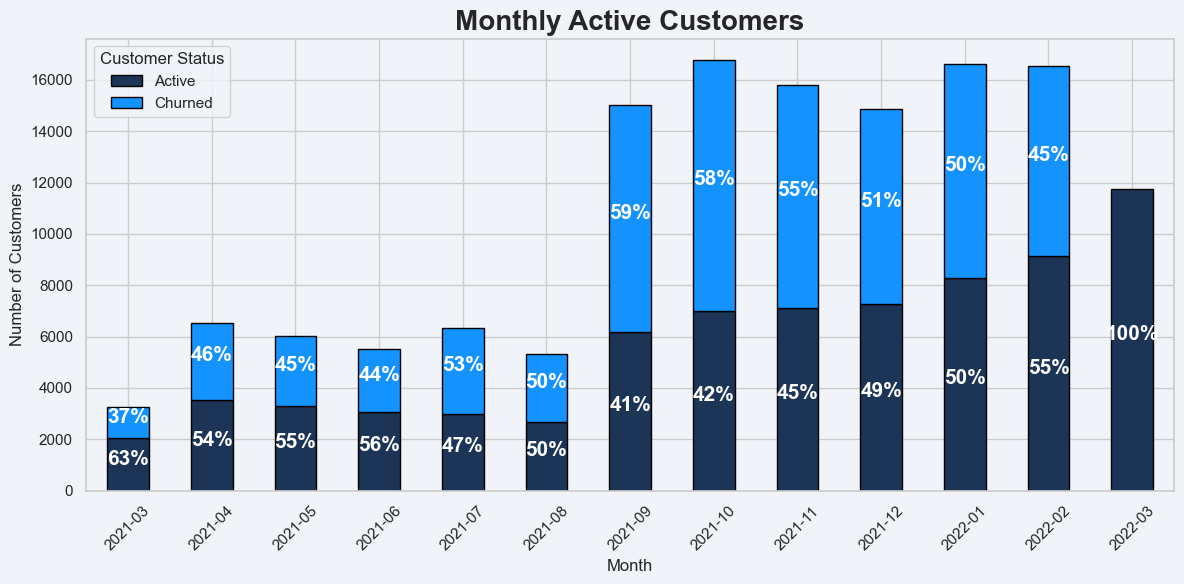

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Ensure 'placed_date' is a datetime object
final_df['placed_date'] = pd.to_datetime(final_df['placed_date'])

# Define churn as no bets placed in the last 30 days
cutoff_date = final_df['placed_date'].max() - datetime.timedelta(days=30)
final_df['is_churned'] = final_df['playerid'].isin(
    final_df[final_df['placed_date'] > cutoff_date]['playerid']
).map({True: 0, False: 1})

# Extract the month and year for grouping
final_df['placed_month'] = final_df['placed_date'].dt.to_period('M')

# Analyze churned vs active customers by month
monthly_churn = final_df.groupby(['placed_month', 'is_churned'])['playerid'].nunique().unstack(fill_value=0)
monthly_churn.columns = ['Active', 'Churned']  # Rename columns for clarity

# Calculate percentages
monthly_churn['Total'] = monthly_churn['Active'] + monthly_churn['Churned']
monthly_churn['Active %'] = (monthly_churn['Active'] / monthly_churn['Total']) * 100
monthly_churn['Churned %'] = (monthly_churn['Churned'] / monthly_churn['Total']) * 100

# Plot churned vs active customers over time with percentages
fig, ax = plt.subplots(figsize=(12, 6))
monthly_churn[['Active', 'Churned']].plot(kind='bar', stacked=True, ax=ax, color=['#1C3456', '#1493FF'], edgecolor='black')

# Add labels and title
ax.set_title('Monthly Active Customers', fontsize=20, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.legend(title='Customer Status', loc='upper left')

# Format x-axis
ax.set_xticklabels([str(month) for month in monthly_churn.index], rotation=45)

# Annotate bars with percentages (bold and larger font)
for i, (active, churned, total) in enumerate(zip(monthly_churn['Active'], monthly_churn['Churned'], monthly_churn['Total'])):
    active_pct = (active / total) * 100
    churned_pct = (churned / total) * 100
    if i == 12:
        ax.text(i, active / 2, f"{active_pct:.0f}%", ha='center', color='white', fontsize=15, fontweight='bold')
    else:
    # Position annotations in the middle of the bars
        ax.text(i, active / 2, f"{active_pct:.0f}%", ha='center', color='white', fontsize=15, fontweight='bold')
        ax.text(i, active + churned / 2, f"{churned_pct:.0f}%", ha='center', color='white', fontsize=15, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#############################

In [58]:
# Group data by player, phase, and bet type to summarize
phase_summary = final_df.groupby(['playerid', 'phase', 'bet_type']).agg(
    total_stake=('allocated_net_stake', 'sum'),
    total_ggr=('allocated_ggr', 'sum'),
    bet_count=('playerid_wagerid', 'count')
).reset_index()
phase_summary

,playerid,phase,bet_type,total_stake,total_ggr,bet_count
0,10005028,early,straight,5.000000,5.000000,1
1,10005028,later,straight,10.000000,10.000000,1
2,10009800,early,parlay,44.583332,14.055832,17
3,10009800,early,straight,50.000000,50.000000,10
4,10009800,later,parlay,5.000000,5.000000,3
...,...,...,...,...,...,...
105159,9995384,later,straight,812.800000,466.230000,24
105160,9999500,early,parlay,10.666666,10.666666,9
105161,9999500,early,straight,71.000000,20.000000,6
105162,9999500,later,parlay,13.541666,9.166666,17


In [59]:
# Pivot table to summarize bet counts for each phase and type
pivot_summary = phase_summary.pivot_table(
    index='playerid',
    columns=['phase', 'bet_type'],
    values='bet_count',
    fill_value=0  # Replace NaN with 0
)

# Flatten the multi-index columns into a single level and rename
pivot_summary.columns = [
    f"{phase}_{bet_type}" for phase, bet_type in pivot_summary.columns
]

# Reset the index for a clean DataFrame
pivot_summary.reset_index(inplace=True)


In [60]:
pivot_summary

,playerid,early_parlay,early_straight,later_parlay,later_straight
0,10005028,0,1,0,1
1,10009800,17,10,3,16
2,10010175,44,151,52,148
3,10013683,153,151,166,135
4,10019342,0,0,12,0
...,...,...,...,...,...
36313,9974148,0,4,8,2
36314,9979075,7,0,11,0
36315,9984359,5,0,0,2
36316,9995384,59,15,35,24


In [61]:
print(phase_summary.groupby(['phase', 'bet_type'])['bet_count'].sum())

phase  bet_type
early  parlay      1169875
       straight     847117
later  parlay      1212917
       straight     860396
Name: bet_count, dtype: int64


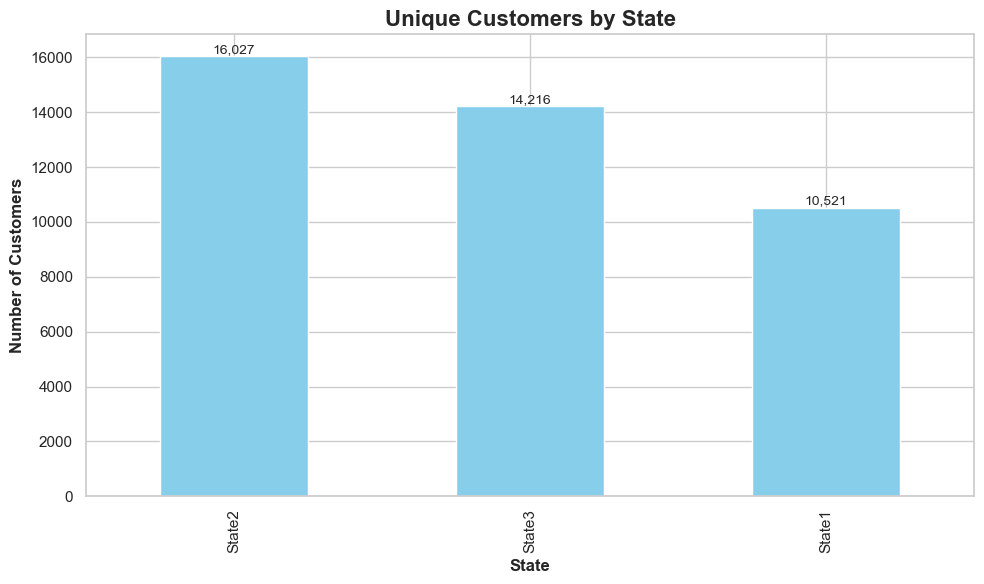

In [62]:
##############
# State Analysis
##############

# Count unique customers by state
state_customer_count = final_df.groupby('state')['playerid'].nunique().sort_values(ascending=False)

# Visualize
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
state_customer_count.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Unique Customers by State', fontsize=16, fontweight='bold')
ax.set_xlabel('State', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Customers', fontsize=12, fontweight='bold')

# Display value labels on top of the bars
for i, val in enumerate(state_customer_count):
    ax.text(i, val + 0.5, f"{val:,}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()





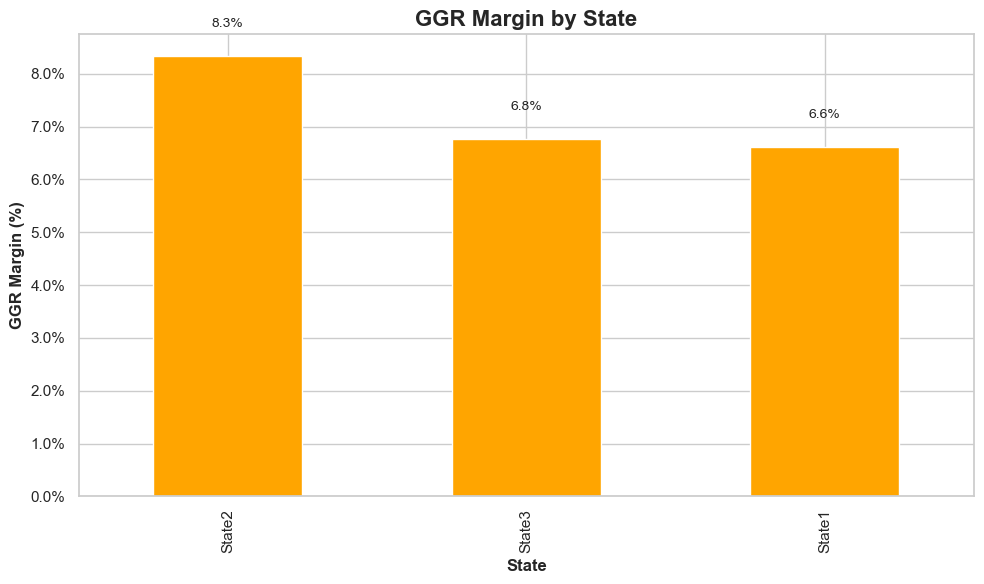

In [63]:
# Calculate GGR Margin
state_ggr_margin = (final_df.groupby('state')['allocated_ggr'].sum() /
                    final_df.groupby('state')['allocated_net_stake'].sum()) * 100

# Sort by GGR Margin
state_ggr_margin = state_ggr_margin.sort_values(ascending=False)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
state_ggr_margin.plot(kind='bar', color='orange', ax=ax)
ax.set_title('GGR Margin by State', fontsize=16, fontweight='bold')
ax.set_xlabel('State', fontsize=12, fontweight='bold')
ax.set_ylabel('GGR Margin (%)', fontsize=12, fontweight='bold')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

# Display value labels
for i, val in enumerate(state_ggr_margin):
    ax.text(i, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


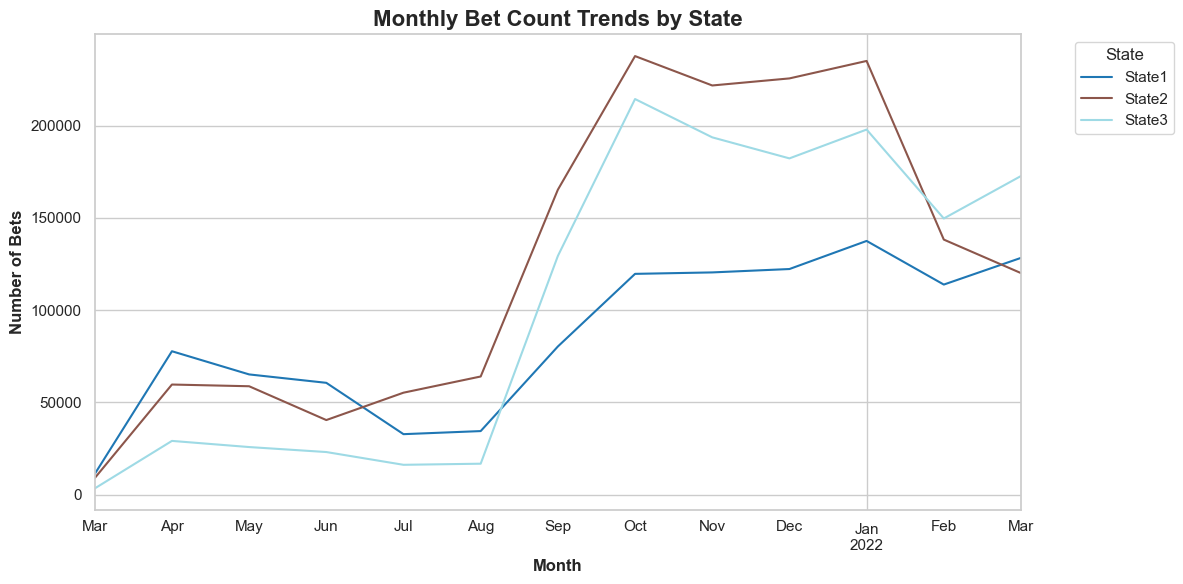

In [64]:
# Convert 'placed_date' to datetime
final_df['placed_date'] = pd.to_datetime(final_df['placed_date'])

# Aggregate monthly bet counts by state
state_monthly_bets = final_df.groupby([final_df['placed_date'].dt.to_period('M'), 'state'])['playerid'].count().unstack()

# Plotting the trend
fig, ax = plt.subplots(figsize=(12, 6))
state_monthly_bets.plot(ax=ax, cmap='tab20')
ax.set_title('Monthly Bet Count Trends by State', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Bets', fontsize=12, fontweight='bold')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
######################
# Trends Over Time
######################

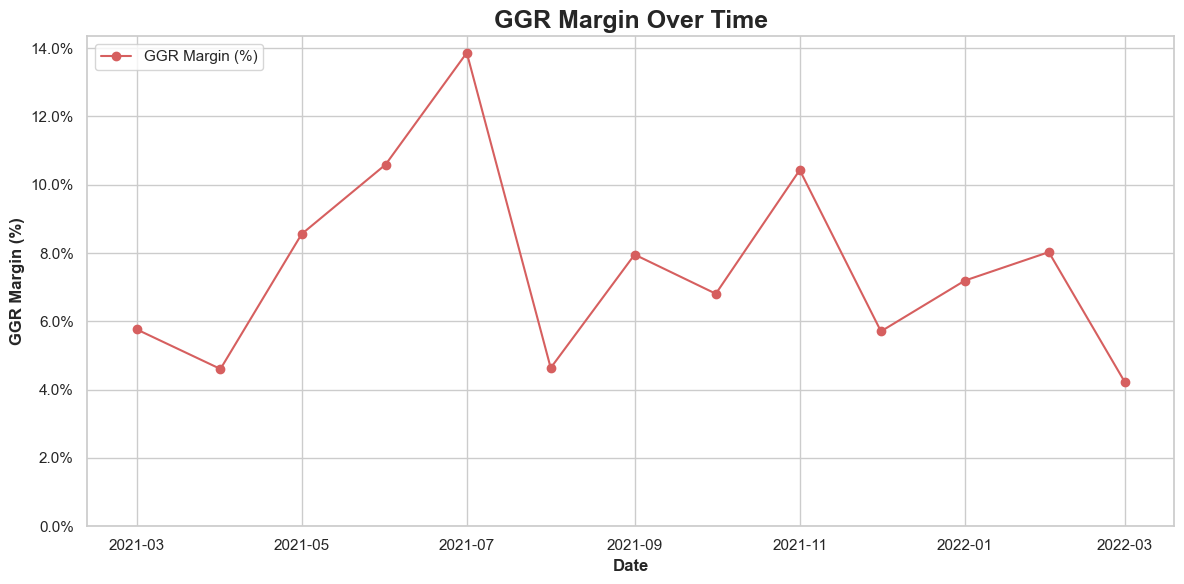

In [65]:
# Ensure 'placed_date' is in datetime format
final_df['placed_date'] = pd.to_datetime(final_df['placed_date'])

# Group by month and aggregate allocated_net_stake and allocated_ggr
df_grouped = final_df.groupby(final_df['placed_date'].dt.to_period('M')).agg({
    'allocated_net_stake': 'sum',
    'allocated_ggr': 'sum'
}).reset_index()

# Convert 'placed_date' back to a datetime object for plotting
df_grouped['placed_date'] = df_grouped['placed_date'].dt.to_timestamp()

# Calculate margin as a percentage
df_grouped['ggr_margin_percentage'] = (df_grouped['allocated_ggr'] / df_grouped['allocated_net_stake']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Set seaborn style
sns.set_style("whitegrid")

# Plot margin as a percentage
ax.plot(
    df_grouped['placed_date'],
    df_grouped['ggr_margin_percentage'],
    color=sns.color_palette("muted")[3],
    marker='o',
    label='GGR Margin (%)'
)

# Format Y-axis as percentage
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

# Ensure Y-axis starts at 0%
ax.set_ylim(0, None)

# Add labels and title
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('GGR Margin (%)', fontsize=12, fontweight='bold')
ax.set_title('GGR Margin Over Time', fontsize=18, fontweight='bold')

# Add legend
ax.legend(loc='upper left')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


<Axes: title={'center': 'When Customers First Joined the Platform'}, xlabel='Month', ylabel='Number of New Customers'>

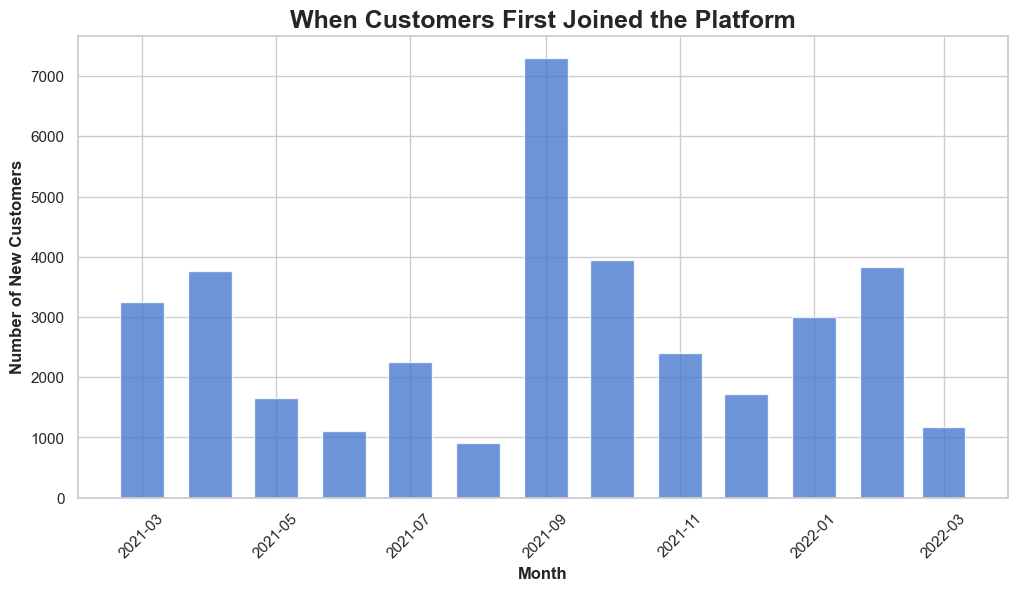

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'placed_date' is in datetime format
final_df['placed_date'] = pd.to_datetime(final_df['placed_date'])

# Find the first bet date (inferred joined date) for each player
first_bet_dates = final_df.groupby('playerid')['placed_date'].min().reset_index()
first_bet_dates.rename(columns={'placed_date': 'joined_date'}, inplace=True)

# Extract month and year for grouping
first_bet_dates['join_month'] = first_bet_dates['joined_date'].dt.to_period('M')

# Group by join_month to count new customers per month
join_trend = first_bet_dates.groupby('join_month').size().reset_index(name='customer_count')

# Convert join_month back to a datetime object for plotting
join_trend['join_month'] = join_trend['join_month'].dt.to_timestamp()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Set seaborn style
sns.set_style("whitegrid")

# Plot the number of customers joining over time with wider bars
ax.bar(
    join_trend['join_month'],
    join_trend['customer_count'],
    width=20,  # Adjusting the bar width
    color=sns.color_palette("muted")[0],
    alpha=0.8,
    label='Customers Joined'
)

# Add labels and title
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of New Customers', fontsize=12, fontweight='bold')
ax.set_title('When Customers First Joined the Platform', fontsize=18, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
ax


In [ ]:
#################
# Single Sport Parlay vs Multi Sport Parlays
#################

In [67]:
# Identify unique sports per parlay (grouped by wagerid and playerid)
parlay_sports = (
    parlay.groupby(['wagerid', 'playerid'])['sportname']
    .nunique()
    .reset_index()
    .rename(columns={'sportname': 'unique_sports_count'})
)

# Merge the unique sports count back into the original dataframe
parlay = pd.merge(parlay, parlay_sports, on=['wagerid', 'playerid'])

# Categorize parlays into single-sport and multi-sport
parlay['parlay_type'] = parlay['unique_sports_count'].apply(lambda x: 'Single-Sport' if x == 1 else 'Multi-Sport')
parlay


,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds,event_start_date,event_start_time,timezone_offset,playerid_wagerid,sport_count,allocated_net_stake,allocated_ggr,ggr_margin,unique_sports_count,parlay_type
0,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,won,1.781250,2021-04-28,01:45:00,00,222371701696370,4,1.250,1.250,1.0,1,Single-Sport
1,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.862070,2021-04-28,01:45:00,00,222371701696370,4,1.250,1.250,1.0,1,Single-Sport
2,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.746270,2021-04-28,01:45:00,00,222371701696370,4,1.250,1.250,1.0,1,Single-Sport
3,State1,22237170,1696370,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.781250,2021-04-28,01:45:00,00,222371701696370,4,1.250,1.250,1.0,1,Single-Sport
4,State1,1499189,1702908,2021-04-27 23:15:00+00,2021-04-27,2021-04-27,nba,parlay,lost,6.31,6.31,lost,1.909090,2021-04-27,23:15:00,00,14991891702908,2,3.155,3.155,1.0,1,Single-Sport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382787,State3,23395605,128198772,2021-04-21 02:15:00+00,2021-04-20,2021-04-21,nba,parlay,lost,12.50,12.50,lost,2.051000,2021-04-21,02:15:00,00,23395605128198772,4,3.125,3.125,1.0,1,Single-Sport
2382788,State3,23395605,128199174,2021-04-21 02:15:00+00,2021-04-20,2021-04-21,nba,parlay,lost,5.00,5.00,lost,3.700000,2021-04-21,02:15:00,00,23395605128199174,2,2.500,2.500,1.0,1,Single-Sport
2382789,State3,23395605,128199174,2021-04-21 02:15:00+00,2021-04-20,2021-04-21,nba,parlay,lost,5.00,5.00,won,1.833333,2021-04-21,02:15:00,00,23395605128199174,2,2.500,2.500,1.0,1,Single-Sport
2382790,State3,23237258,128201064,2021-04-21 02:11:00+00,2021-04-20,2021-04-20,mlb,parlay,lost,14.50,14.50,won,1.606060,2021-04-21,02:11:00,00,23237258128201064,2,7.250,7.250,1.0,1,Single-Sport


In [68]:
# Aggregate metrics by parlay type
performance_metrics = (
    parlay.groupby('parlay_type')
    .agg({
        'wagerid': 'nunique',  # Total parlays
        'allocated_net_stake': ['sum', 'mean'],  # Total and average net stake
        'allocated_ggr': ['sum', 'mean'],  # Total and average GGR
    })
)

# Flatten column names
performance_metrics.columns = ['Total Parlays', 'Total Net Stake', 'Average Net Stake', 'Total GGR', 'Average GGR']

# Calculate GGR Margin
performance_metrics['GGR Margin (%)'] = (performance_metrics['Total GGR'] / performance_metrics['Total Net Stake']) * 100

# Reset index for visualization
performance_metrics = performance_metrics.reset_index()

print(performance_metrics)


    parlay_type  Total Parlays  Total Net Stake  Average Net Stake  \
0   Multi-Sport          84325     2.787014e+06           8.014465   
1  Single-Sport         582751     8.439379e+06           4.147025   

      Total GGR  Average GGR  GGR Margin (%)  
0  5.523101e+05     1.588248       19.817268  
1  1.352602e+06     0.664655       16.027272  


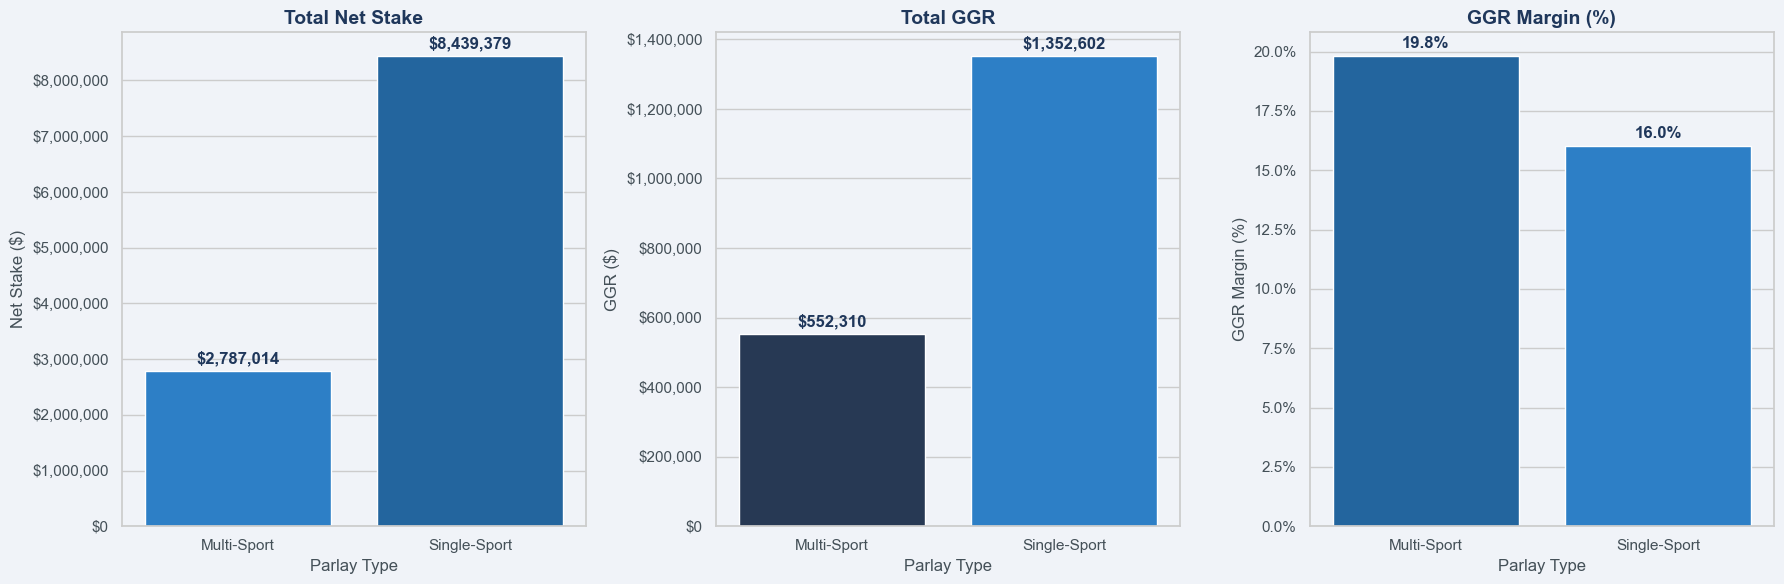

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the FanDuel color palette
fanduel_colors = {
    'navy': '#1F375B',
    'blue_d1': '#1381E0',
    'blue_d2': '#0E67B3',
    'grey_d4': '#445058',
    'grey_l2': '#CFD6DB',
    'white': '#FFFFFF',
    'screen_background': '#F0F3F8'
}

# Set seaborn style and background color
sns.set_style("whitegrid")
plt.rcParams['axes.facecolor'] = fanduel_colors['screen_background']
plt.rcParams['figure.facecolor'] = fanduel_colors['screen_background']

# Create subplots for visualizing performance metrics
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Function to add data labels on the bars
def add_data_labels(ax, data, column):
    for i, value in enumerate(data[column]):
        label = f"${value:,.0f}" if column != 'GGR Margin (%)' else f"{value:.1f}%"
        ax.text(
            i, value + 0.01 * max(data[column]),  # Position slightly above the bar
            label, ha='center', va='bottom', fontsize=12,  # Larger fontsize for better readability
            color=fanduel_colors['navy'], fontweight='bold'
        )

# Plot for Total Net Stake
sns.barplot(
    data=performance_metrics,
    x='parlay_type',
    y='Total Net Stake',
    ax=ax[0],
    palette=[fanduel_colors['blue_d1'], fanduel_colors['blue_d2']]
)
ax[0].set_title('Total Net Stake', fontsize=14, color=fanduel_colors['navy'], fontweight='bold')
ax[0].set_ylabel('Net Stake ($)', fontsize=12, color=fanduel_colors['grey_d4'])
ax[0].set_xlabel('Parlay Type', fontsize=12, color=fanduel_colors['grey_d4'])
ax[0].tick_params(colors=fanduel_colors['grey_d4'])
ax[0].yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
add_data_labels(ax[0], performance_metrics, 'Total Net Stake')

# Plot for Total GGR
sns.barplot(
    data=performance_metrics,
    x='parlay_type',
    y='Total GGR',
    ax=ax[1],
    palette=[fanduel_colors['navy'], fanduel_colors['blue_d1']]
)
ax[1].set_title('Total GGR', fontsize=14, color=fanduel_colors['navy'], fontweight='bold')
ax[1].set_ylabel('GGR ($)', fontsize=12, color=fanduel_colors['grey_d4'])
ax[1].set_xlabel('Parlay Type', fontsize=12, color=fanduel_colors['grey_d4'])
ax[1].tick_params(colors=fanduel_colors['grey_d4'])
ax[1].yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
add_data_labels(ax[1], performance_metrics, 'Total GGR')

# Plot for GGR Margin
sns.barplot(
    data=performance_metrics,
    x='parlay_type',
    y='GGR Margin (%)',
    ax=ax[2],
    palette=[fanduel_colors['blue_d2'], fanduel_colors['blue_d1']]
)
ax[2].set_title('GGR Margin (%)', fontsize=14, color=fanduel_colors['navy'], fontweight='bold')
ax[2].set_ylabel('GGR Margin (%)', fontsize=12, color=fanduel_colors['grey_d4'])
ax[2].set_xlabel('Parlay Type', fontsize=12, color=fanduel_colors['grey_d4'])
ax[2].tick_params(colors=fanduel_colors['grey_d4'])
ax[2].yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())
add_data_labels(ax[2], performance_metrics, 'GGR Margin (%)')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [66]:
# Step 1: Add unique_sports column to your dataset
final_df['unique_sports'] = final_df.groupby('wagerid')['sportname'].transform('nunique')

parlay = final_df[final_df['bet_type'] == 'parlay']


# Step 2: Group data to calculate performance metrics
performance_metrics = parlay.groupby('unique_sports').agg({
    'allocated_net_stake': 'sum',  # Total Net Stake
    'allocated_ggr': 'sum'        # Total GGR
}).reset_index()

# Step 3: Calculate GGR Margin
performance_metrics['GGR Margin (%)'] = (performance_metrics['allocated_ggr'] / performance_metrics['allocated_net_stake']) * 100

# Step 4: Rename columns for visualization
performance_metrics.rename(columns={
    'allocated_net_stake': 'Total Net Stake',
    'allocated_ggr': 'Total GGR'
}, inplace=True)


In [67]:
performance_metrics

,unique_sports,Total Net Stake,Total GGR,GGR Margin (%)
0,1,8.278005e+06,1.336856e+06,16.149490
1,2,2.395955e+06,4.466100e+05,18.640170
2,3,5.025984e+05,1.104854e+05,21.982839
3,4,4.806767e+04,1.146974e+04,23.861656
4,5,1.767596e+03,-5.084339e+02,-28.764153


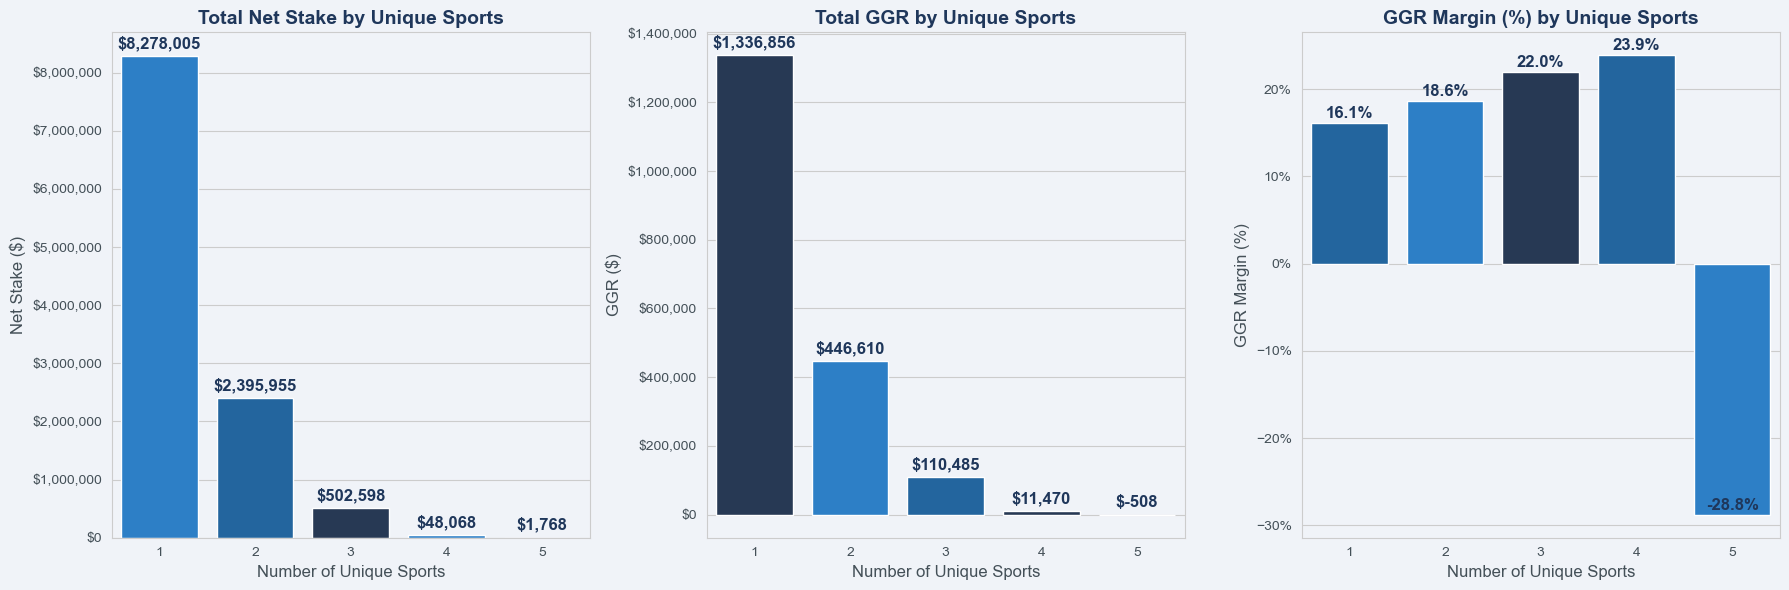

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the FanDuel color palette
fanduel_colors = {
    'navy': '#1F375B',
    'blue_d1': '#1381E0',
    'blue_d2': '#0E67B3',
    'grey_d4': '#445058',
    'grey_l2': '#CFD6DB',
    'white': '#FFFFFF',
    'screen_background': '#F0F3F8'
}

# Set seaborn style and background color
sns.set_style("whitegrid")
plt.rcParams['axes.facecolor'] = fanduel_colors['screen_background']
plt.rcParams['figure.facecolor'] = fanduel_colors['screen_background']

# Create subplots for visualizing performance metrics
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Function to add data labels on the bars
def add_data_labels(ax, data, column):
    for i, value in enumerate(data[column]):
        label = f"${value:,.0f}" if column != 'GGR Margin (%)' else f"{value:.1f}%"
        ax.text(
            i, value + 0.01 * max(data[column]),  # Position slightly above the bar
            label, ha='center', va='bottom', fontsize=12,  # Larger fontsize for better readability
            color=fanduel_colors['navy'], fontweight='bold'
        )

# Plot for Total Net Stake
sns.barplot(
    data=performance_metrics,
    x='unique_sports',
    y='Total Net Stake',
    ax=ax[0],
    palette=[fanduel_colors['blue_d1'], fanduel_colors['blue_d2'], fanduel_colors['navy']]
)
ax[0].set_title('Total Net Stake by Unique Sports', fontsize=14, color=fanduel_colors['navy'], fontweight='bold')
ax[0].set_ylabel('Net Stake ($)', fontsize=12, color=fanduel_colors['grey_d4'])
ax[0].set_xlabel('Number of Unique Sports', fontsize=12, color=fanduel_colors['grey_d4'])
ax[0].tick_params(colors=fanduel_colors['grey_d4'])
ax[0].yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
add_data_labels(ax[0], performance_metrics, 'Total Net Stake')

# Plot for Total GGR
sns.barplot(
    data=performance_metrics,
    x='unique_sports',
    y='Total GGR',
    ax=ax[1],
    palette=[fanduel_colors['navy'], fanduel_colors['blue_d1'], fanduel_colors['blue_d2']]
)
ax[1].set_title('Total GGR by Unique Sports', fontsize=14, color=fanduel_colors['navy'], fontweight='bold')
ax[1].set_ylabel('GGR ($)', fontsize=12, color=fanduel_colors['grey_d4'])
ax[1].set_xlabel('Number of Unique Sports', fontsize=12, color=fanduel_colors['grey_d4'])
ax[1].tick_params(colors=fanduel_colors['grey_d4'])
ax[1].yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
add_data_labels(ax[1], performance_metrics, 'Total GGR')

# Plot for GGR Margin
sns.barplot(
    data=performance_metrics,
    x='unique_sports',
    y='GGR Margin (%)',
    ax=ax[2],
    palette=[fanduel_colors['blue_d2'], fanduel_colors['blue_d1'], fanduel_colors['navy']]
)
ax[2].set_title('GGR Margin (%) by Unique Sports', fontsize=14, color=fanduel_colors['navy'], fontweight='bold')
ax[2].set_ylabel('GGR Margin (%)', fontsize=12, color=fanduel_colors['grey_d4'])
ax[2].set_xlabel('Number of Unique Sports', fontsize=12, color=fanduel_colors['grey_d4'])
ax[2].tick_params(colors=fanduel_colors['grey_d4'])
ax[2].yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())
add_data_labels(ax[2], performance_metrics, 'GGR Margin (%)')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
################
# Profitability by Parlay Size
################

In [76]:
parlay[parlay['playerid_wagerid']=='10019956161326211']

,state,playerid,wagerid,placed_date,settled_date,sportname,bet_type,result,legresult,decimalodds,event_start_date,event_start_time,playerid_wagerid,sport_count,allocated_net_stake,allocated_ggr,Wager_Order,total_bets,phase,unique_sports
1077,State2,10019956,161326211,2021-04-27,2021-04-27,nhl,parlay,won,won,1.8,2021-04-28,00:10:00,10019956161326211,1,6.31,-9.98626,9,120,early,1


In [74]:
parlay_size_df[parlay_size_df['parlay_size']==1]

,playerid_wagerid,parlay_size,allocated_net_stake,allocated_ggr
148,10019956161326211,1,6.310,-9.986260
149,10019956161617069,1,15.245,-12.499673
150,10019956161635850,1,11.095,11.095000
151,10019956162303516,1,10.000,-18.403547
152,10019956162388993,1,10.905,10.905000
...,...,...,...,...
667889,973933636923291,1,5.000,-4.715000
668208,98705769581857,1,5.715,5.715000
668374,989638924215812,1,50.000,33.530000
668500,992863984301157,1,7.500,7.500000


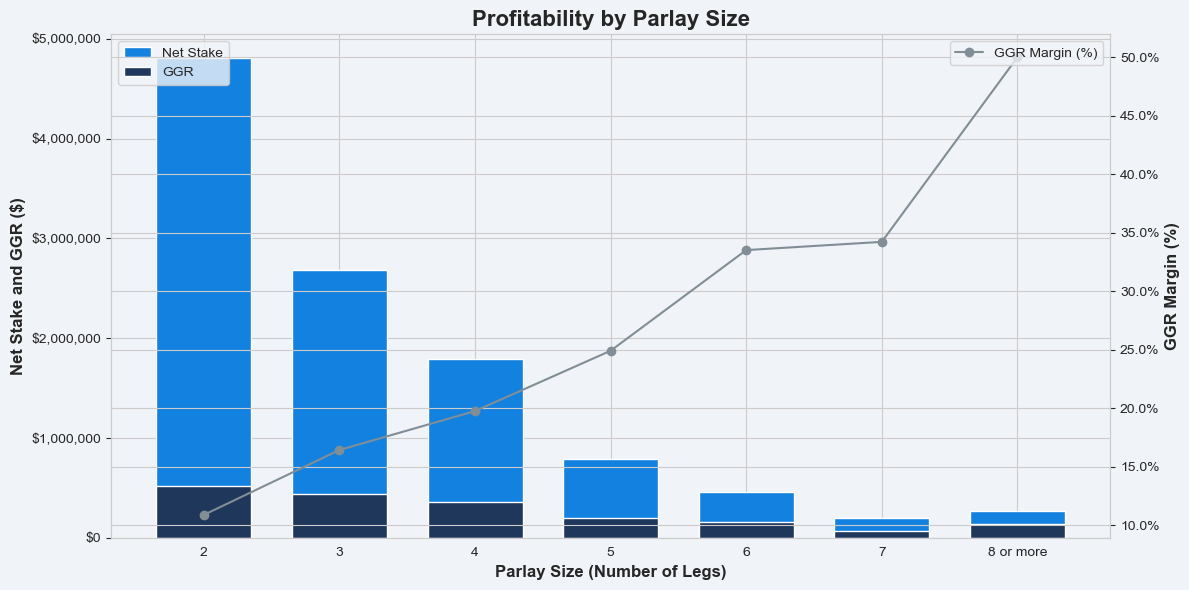

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate parlay size by counting unique sport legs per wager
parlay_size_df = parlay.groupby(['playerid_wagerid']).agg({
    'sportname': 'count',  # Count legs per parlay
    'allocated_net_stake': 'sum',
    'allocated_ggr': 'sum'
}).reset_index()

# Add parlay size column
parlay_size_df.rename(columns={'sportname': 'parlay_size'}, inplace=True)

# Filter out single-leg bets
parlay_size_df = parlay_size_df[parlay_size_df['parlay_size'] > 1]

# Group bets with 8 or more legs into one bin
parlay_size_df['parlay_size'] = parlay_size_df['parlay_size'].apply(lambda x: 8 if x >= 8 else x)

# Ensure all parlay size categories (2 through 8) are present
all_sizes = pd.DataFrame({'parlay_size': range(2, 9)})  # Sizes from 2 to 8

# Group by parlay size and calculate profitability
profitability_by_size = parlay_size_df.groupby('parlay_size').agg({
    'allocated_net_stake': 'sum',
    'allocated_ggr': 'sum'
}).reset_index()

# Merge to include all sizes, filling missing values with 0
profitability_by_size = all_sizes.merge(profitability_by_size, on='parlay_size', how='left').fillna(0)

# Add GGR Margin (%) column
profitability_by_size['ggr_margin_percentage'] = (
    profitability_by_size['allocated_ggr'] / profitability_by_size['allocated_net_stake']
) * 100

# Handle cases where allocated_net_stake is 0 to avoid division by zero
profitability_by_size['ggr_margin_percentage'] = profitability_by_size['ggr_margin_percentage'].fillna(0)

# Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.set_palette(['#1381E0', '#1F375B'])

# Bar plot for Net Stake and GGR
bar_width = 0.7
x_positions = profitability_by_size['parlay_size']

ax1.bar(
    x=x_positions,
    height=profitability_by_size['allocated_net_stake'],
    color='#1381E0',
    width=bar_width,
    label='Net Stake'
)
ax1.bar(
    x=x_positions,
    height=profitability_by_size['allocated_ggr'],
    color='#1F375B',
    width=bar_width,
    label='GGR'
)

# Format y-axis with dollar signs and commas
ax1.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
ax1.set_xlabel('Parlay Size (Number of Legs)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Net Stake and GGR ($)', fontsize=12, fontweight='bold')
ax1.set_title('Profitability by Parlay Size', fontsize=16, fontweight='bold')
ax1.legend(loc='upper left')

# Secondary y-axis for GGR Margin (%)
ax2 = ax1.twinx()
ax2.plot(
    x_positions,
    profitability_by_size['ggr_margin_percentage'],
    color='#818E95',
    marker='o',
    label='GGR Margin (%)'
)
ax2.set_ylabel('GGR Margin (%)', fontsize=12, fontweight='bold')
ax2.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())
ax2.legend(loc='upper right')

# Set x-axis labels
x_labels = list(profitability_by_size['parlay_size'].astype(str))
x_labels[-1] = "8 or more"  # Replace the label for the "8" bucket
ax1.set_xticks(x_positions)
ax1.set_xticklabels(x_labels)

plt.tight_layout()
plt.show()


In [78]:
profitability_by_size

,parlay_size,allocated_net_stake,allocated_ggr,ggr_margin_percentage
0,2,4.803808e+06,523252.319807,10.892449
1,3,2.681912e+06,440860.536367,16.438292
2,4,1.791413e+06,354098.791740,19.766454
3,5,7.885031e+05,196503.039701,24.921023
4,6,4.598026e+05,154152.120830,33.525718
5,7,1.995227e+05,68293.880541,34.228631
6,8,2.660195e+05,133016.672673,50.002599


In [ ]:
##################
# Impact on Odds
##################

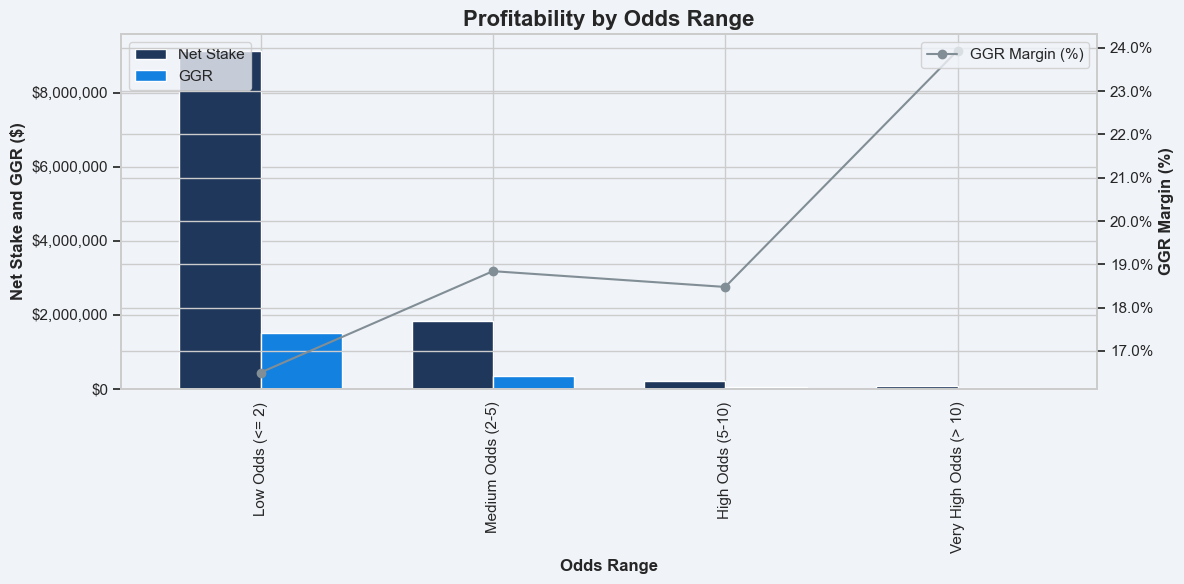

In [71]:
# Bin parlays by odds ranges (e.g., Low, Medium, High)
odds_bins = [-float('inf'), 2.0, 5.0, 10.0, float('inf')]
odds_labels = ['Low Odds (<= 2)', 'Medium Odds (2-5)', 'High Odds (5-10)', 'Very High Odds (> 10)']
parlay['odds_range'] = pd.cut(parlay['decimalodds'], bins=odds_bins, labels=odds_labels)

# Group by odds range and calculate profitability
profitability_by_odds = parlay.groupby('odds_range').agg({
    'allocated_net_stake': 'sum',
    'allocated_ggr': 'sum'
}).reset_index()

# Add GGR Margin (%) column
profitability_by_odds['ggr_margin_percentage'] = (
    profitability_by_odds['allocated_ggr'] / profitability_by_odds['allocated_net_stake']
) * 100

# Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.set_palette(['#1F375B', '#1381E0'])

# Bar plot for Net Stake and GGR
profitability_by_odds.plot(
    x='odds_range',
    y=['allocated_net_stake', 'allocated_ggr'],
    kind='bar',
    ax=ax1,
    width=0.7,
    color=['#1F375B', '#1381E0']
)

# Format y-axis with dollar signs and commas
ax1.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
ax1.set_xlabel('Odds Range', fontsize=12, fontweight='bold')
ax1.set_ylabel('Net Stake and GGR ($)', fontsize=12, fontweight='bold')
ax1.set_title('Profitability by Odds Range', fontsize=16, fontweight='bold')
ax1.legend(['Net Stake', 'GGR'], loc='upper left')

# Secondary y-axis for GGR Margin (%)
ax2 = ax1.twinx()
ax2.plot(
    profitability_by_odds['odds_range'],
    profitability_by_odds['ggr_margin_percentage'],
    color='#818E95',
    marker='o',
    label='GGR Margin (%)'
)
ax2.set_ylabel('GGR Margin (%)', fontsize=12, fontweight='bold')
ax2.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
######################
# Customer Segmentation
######################

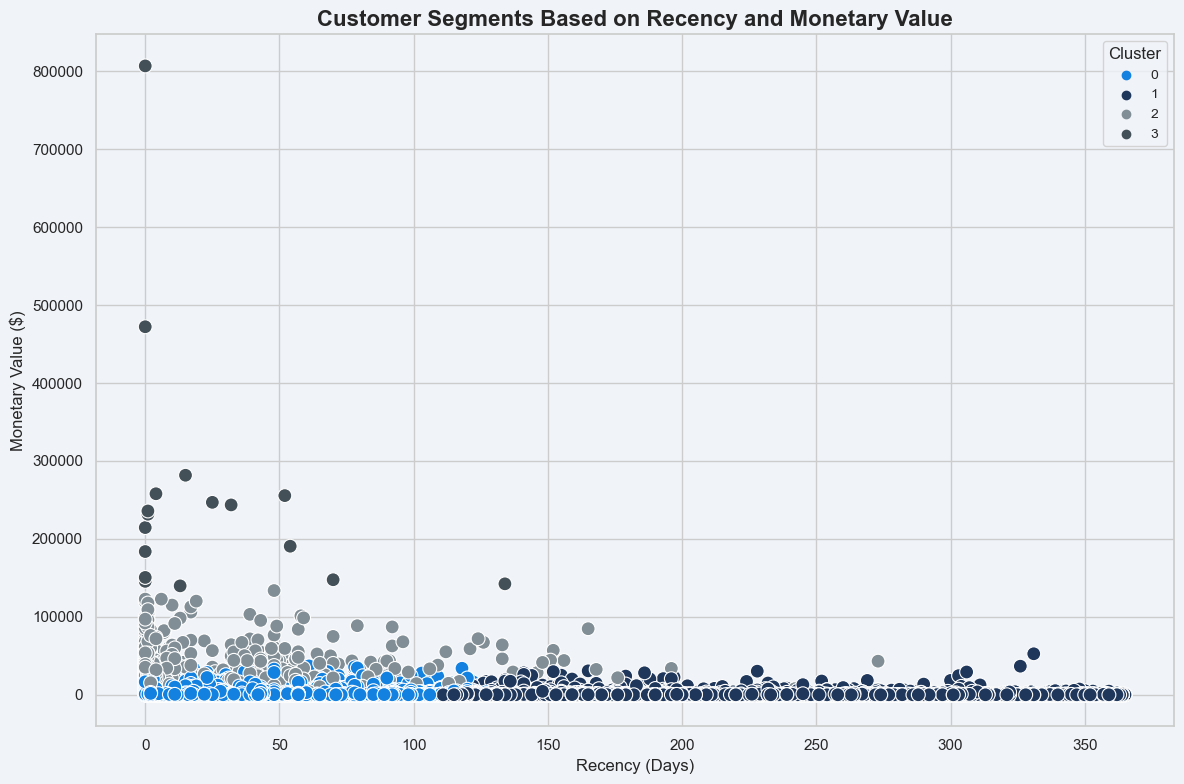

   cluster     recency   frequency       monetary  customer_count
0        0   37.445657   52.453593    1439.513652           24824
1        1  190.065637   11.801070     446.271567            9903
2        2   16.137953  599.157661   21459.654860            1573
3        3   22.277778  832.944444  249712.553394              18


In [72]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'placed_date' is in datetime format
final_df['placed_date'] = pd.to_datetime(final_df['placed_date'])

# Step 1: Calculate RFM metrics
# Recency: Days since last bet
recency = final_df.groupby('playerid')['placed_date'].max().reset_index()
recency['recency'] = (final_df['placed_date'].max() - recency['placed_date']).dt.days
recency = recency[['playerid', 'recency']]

# Frequency: Total number of unique bets
frequency = final_df.groupby('playerid')['wagerid'].nunique().reset_index()
frequency.rename(columns={'wagerid': 'frequency'}, inplace=True)

# Monetary: Total net stake and GGR
monetary = final_df.groupby('playerid').agg({
    'allocated_net_stake': 'sum',
    'allocated_ggr': 'sum'
}).reset_index()
monetary['monetary'] = monetary['allocated_net_stake']  # Choose one metric for clustering

# Combine RFM features
rfm_df = recency.merge(frequency, on='playerid').merge(monetary[['playerid', 'monetary']], on='playerid')

# Step 2: Standardize the RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['recency', 'frequency', 'monetary']])

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters based on domain knowledge
rfm_df['cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 4: Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='recency',
    y='monetary',
    hue='cluster',
    data=rfm_df,
    palette=['#1381E0', '#1F375B', '#818E95', '#445058'],
    s=100
)
plt.title('Customer Segments Based on Recency and Monetary Value', fontsize=16, fontweight='bold')
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Monetary Value ($)', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.tight_layout()
plt.show()

# Insights: Explore each cluster's characteristics
cluster_summary = rfm_df.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'playerid': 'count'
}).rename(columns={'playerid': 'customer_count'}).reset_index()

print(cluster_summary)


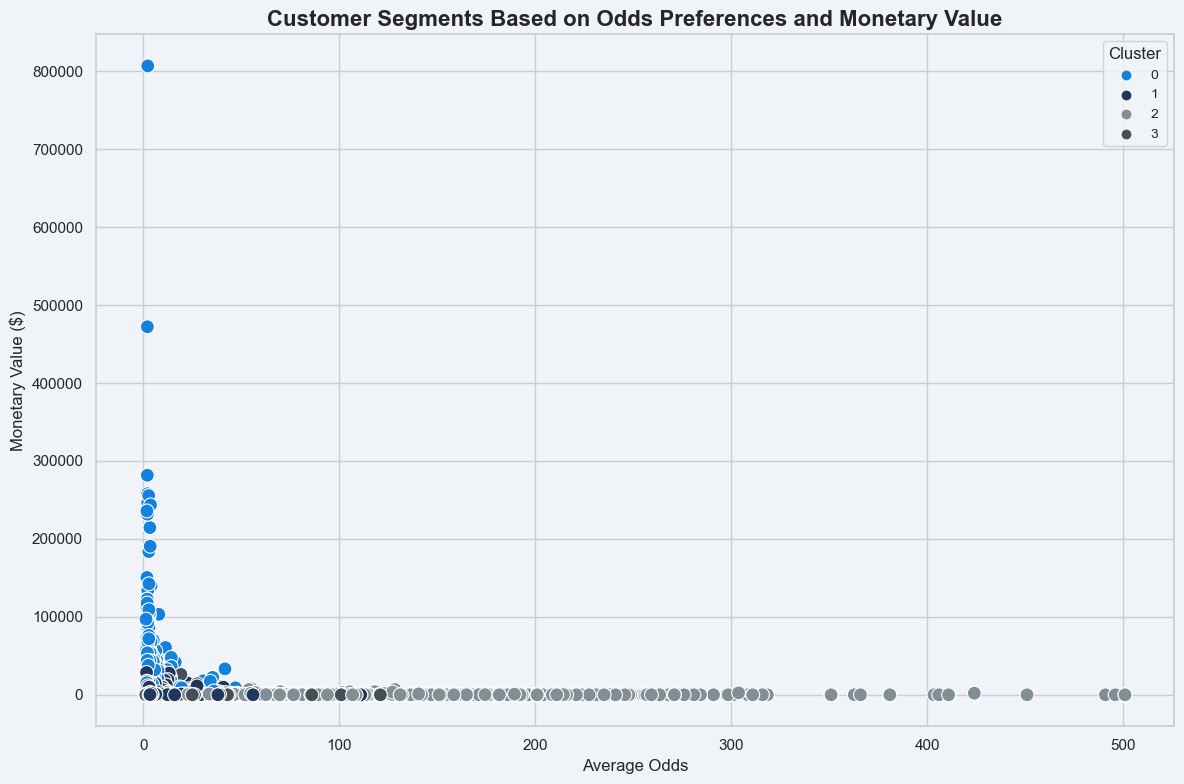

   cluster     recency   frequency      monetary    avg_odds    odds_std  \
0        0   16.188331  640.274742  26684.408247    3.571564    6.438990   
1        1   36.955665   56.702596   1547.436998    5.233678    7.002791   
2        2   49.958438   18.740554    300.588374  119.140386  108.750836   
3        3  189.803737   11.965455    452.436908    4.316656    2.685539   

   customer_count  
0            1354  
1           24270  
2             794  
3            9900  


In [74]:
# Step 1: Calculate odds-related metrics
odds_metrics = final_df.groupby('playerid').agg({
    'decimalodds': ['mean', 'std']  # Mean and standard deviation of odds
}).reset_index()
odds_metrics.columns = ['playerid', 'avg_odds', 'odds_std']  # Flatten multi-level columns

# Handle cases where 'odds_std' is NaN (e.g., players with only one bet)
odds_metrics['odds_std'].fillna(0, inplace=True)

# Step 2: Merge odds metrics with RFM metrics
rfm_with_odds = rfm_df.merge(odds_metrics, on='playerid')

# Step 3: Standardize all features (including odds metrics)
features_to_scale = ['recency', 'frequency', 'monetary', 'avg_odds', 'odds_std']
scaler = StandardScaler()
rfm_scaled_with_odds = scaler.fit_transform(rfm_with_odds[features_to_scale])

# Step 4: Apply K-Means clustering with the enriched feature set
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
rfm_with_odds['cluster'] = kmeans.fit_predict(rfm_scaled_with_odds)

# Step 5: Visualize Clusters (using Avg Odds and Monetary as an example)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='avg_odds',
    y='monetary',
    hue='cluster',
    data=rfm_with_odds,
    palette=['#1381E0', '#1F375B', '#818E95', '#445058'],
    s=100
)
plt.title('Customer Segments Based on Odds Preferences and Monetary Value', fontsize=16, fontweight='bold')
plt.xlabel('Average Odds', fontsize=12)
plt.ylabel('Monetary Value ($)', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.tight_layout()
plt.show()

# Step 6: Cluster Insights
cluster_summary_with_odds = rfm_with_odds.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'avg_odds': 'mean',
    'odds_std': 'mean',
    'playerid': 'count'
}).rename(columns={'playerid': 'customer_count'}).reset_index()

print(cluster_summary_with_odds)
